In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# For the geopandas and geographic data handling
import geopandas as gpd

# for the background maps
import contextily as ctx


# for graphic designing
import seaborn as sns

# For the classifying the 
from shapely.geometry import Point

# To get rid of warnings
import warnings
warnings.filterwarnings('ignore')

### Data Cleaning

In [2]:
crash_path = "Motor_Vehicle_Collisions_Crashes.csv"
person_path = "Motor_Vehicle_Collisions_Person.csv"
vehicles_path = "Motor_Vehicle_Collisions_Vehicles.csv"

# Adjusting the read_csv call to deal with mixed types by specifying dtype=str for problematic columns
df_crashes = pd.read_csv(crash_path, dtype={'ZIP CODE': str})
df_person = pd.read_csv(person_path)
df_vehicles = pd.read_csv(vehicles_path, dtype={'VEHICLE_MODEL': str})

In [3]:
print(df_crashes.columns)
print("--------------------")
print(df_person.columns)
print("--------------------")
print(df_vehicles.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')
--------------------
Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY',

In [4]:
df_crashes.rename(columns={'CRASH DATE': 'CRASH_DATE', 'CRASH TIME': 'CRASH_TIME'}, inplace=True)

### Remove columns on one or more of following conditions:
- Remove column if anywhere from 34% to 50% of the column are NaN Values
- Remove column if it is unreadable or encoded

NOTE: Keep columns if they are deemed important for current or future analysis

In [5]:
df_crashes.isna().sum() / len(df_crashes) > 0.34

CRASH_DATE                       False
CRASH_TIME                       False
BOROUGH                          False
ZIP CODE                         False
LATITUDE                         False
LONGITUDE                        False
LOCATION                         False
ON STREET NAME                   False
CROSS STREET NAME                 True
OFF STREET NAME                   True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED         False
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1    False
CONTRIBUTING FACTOR VEHICLE 2    False
CONTRIBUTING FACTOR VEHICLE 3     True
CONTRIBUTING FACTOR VEHICLE 4     True
CONTRIBUTING FACTOR VEHICLE 5     True
COLLISION_ID                     False
VEHICLE TYPE CODE 1              False
VEHICLE TYPE CODE 2      

In [6]:
df_crashes.isna().sum() / len(df_crashes) > 0.50

CRASH_DATE                       False
CRASH_TIME                       False
BOROUGH                          False
ZIP CODE                         False
LATITUDE                         False
LONGITUDE                        False
LOCATION                         False
ON STREET NAME                   False
CROSS STREET NAME                False
OFF STREET NAME                   True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED         False
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1    False
CONTRIBUTING FACTOR VEHICLE 2    False
CONTRIBUTING FACTOR VEHICLE 3     True
CONTRIBUTING FACTOR VEHICLE 4     True
CONTRIBUTING FACTOR VEHICLE 5     True
COLLISION_ID                     False
VEHICLE TYPE CODE 1              False
VEHICLE TYPE CODE 2      

In [7]:
df_crashes.drop(['OFF STREET NAME',
                 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
                 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
                 axis=1, inplace=True)

In [8]:
df_person.isna().sum() / len(df_person) > 0.34

UNIQUE_ID                False
COLLISION_ID             False
CRASH_DATE               False
CRASH_TIME               False
PERSON_ID                False
PERSON_TYPE              False
PERSON_INJURY            False
VEHICLE_ID               False
PERSON_AGE               False
EJECTION                  True
EMOTIONAL_STATUS          True
BODILY_INJURY             True
POSITION_IN_VEHICLE       True
SAFETY_EQUIPMENT          True
PED_LOCATION              True
PED_ACTION                True
COMPLAINT                 True
PED_ROLE                 False
CONTRIBUTING_FACTOR_1     True
CONTRIBUTING_FACTOR_2     True
PERSON_SEX               False
dtype: bool

In [9]:
df_person.isna().sum() / len(df_person) > 0.50

UNIQUE_ID                False
COLLISION_ID             False
CRASH_DATE               False
CRASH_TIME               False
PERSON_ID                False
PERSON_TYPE              False
PERSON_INJURY            False
VEHICLE_ID               False
PERSON_AGE               False
EJECTION                 False
EMOTIONAL_STATUS         False
BODILY_INJURY            False
POSITION_IN_VEHICLE      False
SAFETY_EQUIPMENT          True
PED_LOCATION              True
PED_ACTION                True
COMPLAINT                False
PED_ROLE                 False
CONTRIBUTING_FACTOR_1     True
CONTRIBUTING_FACTOR_2     True
PERSON_SEX               False
dtype: bool

In [10]:
df_person.drop(['PERSON_ID', 'VEHICLE_ID',
                 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'COMPLAINT',
                 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2'],
                 axis=1, inplace=True)

In [11]:
df_vehicles.isna().sum() / len(df_vehicles) > 0.34

UNIQUE_ID                      False
COLLISION_ID                   False
CRASH_DATE                     False
CRASH_TIME                     False
VEHICLE_ID                     False
STATE_REGISTRATION             False
VEHICLE_TYPE                   False
VEHICLE_MAKE                    True
VEHICLE_MODEL                   True
VEHICLE_YEAR                    True
TRAVEL_DIRECTION                True
VEHICLE_OCCUPANTS               True
DRIVER_SEX                      True
DRIVER_LICENSE_STATUS           True
DRIVER_LICENSE_JURISDICTION     True
PRE_CRASH                      False
POINT_OF_IMPACT                 True
VEHICLE_DAMAGE                  True
VEHICLE_DAMAGE_1                True
VEHICLE_DAMAGE_2                True
VEHICLE_DAMAGE_3                True
PUBLIC_PROPERTY_DAMAGE          True
PUBLIC_PROPERTY_DAMAGE_TYPE     True
CONTRIBUTING_FACTOR_1          False
CONTRIBUTING_FACTOR_2           True
dtype: bool

In [12]:
df_vehicles.isna().sum() / len(df_vehicles) > 0.50

UNIQUE_ID                      False
COLLISION_ID                   False
CRASH_DATE                     False
CRASH_TIME                     False
VEHICLE_ID                     False
STATE_REGISTRATION             False
VEHICLE_TYPE                   False
VEHICLE_MAKE                   False
VEHICLE_MODEL                   True
VEHICLE_YEAR                   False
TRAVEL_DIRECTION               False
VEHICLE_OCCUPANTS              False
DRIVER_SEX                      True
DRIVER_LICENSE_STATUS           True
DRIVER_LICENSE_JURISDICTION     True
PRE_CRASH                      False
POINT_OF_IMPACT                False
VEHICLE_DAMAGE                 False
VEHICLE_DAMAGE_1                True
VEHICLE_DAMAGE_2                True
VEHICLE_DAMAGE_3                True
PUBLIC_PROPERTY_DAMAGE         False
PUBLIC_PROPERTY_DAMAGE_TYPE     True
CONTRIBUTING_FACTOR_1          False
CONTRIBUTING_FACTOR_2          False
dtype: bool

In [13]:
df_vehicles.drop(['VEHICLE_ID', 'VEHICLE_MODEL',
                  'VEHICLE_DAMAGE_1', 'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3',
                  'PUBLIC_PROPERTY_DAMAGE_TYPE'],
                  axis=1, inplace=True)

### LONGITUDE, LATITUDE Values to Remove
- NOTE: NYC has Positive LATITUDE (Northern Hemisphere), and Negative LONGITUDE (Western Hemisphere)
- REMOVE (0.0, 0.0) NOT in NYC
- REMOVE NaN

In [14]:
df_crashes.sort_values('LATITUDE').head()

CRASH_DATE CRASH_TIME   BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
101514   02/11/2022      16:25  BROOKLYN    11225       0.0        0.0   
97871    11/17/2021       0:00    QUEENS    11435       0.0        0.0   
86029    01/22/2022       9:55       NaN      NaN       0.0        0.0   
1026257  10/07/2016      21:30    QUEENS    11102       0.0        0.0   
120464   05/05/2022      21:50    QUEENS    11413       0.0        0.0   

           LOCATION                    ON STREET NAME CROSS STREET NAME  \
101514   (0.0, 0.0)                    MIDWOOD STREET   NOSTRAND AVENUE   
97871    (0.0, 0.0)                    LIBERTY AVENUE  PRINCETON STREET   
86029    (0.0, 0.0)                   FRANKLIN AVENUE               NaN   
1026257  (0.0, 0.0)  23 STREET                                 30 DRIVE   
120464   (0.0, 0.0)                 MERRICK BOULEVARD        219 STREET   

         NUMBER OF PERSONS INJURED  ...  NUMBER OF PEDESTRIANS KILLED  \
101514                         0.0  ...                             0   
97871                          0.0  ...                             0   
86029                          0.0  ...                             0   
1026257                        1.0  ...                             0   
120464                         0.0  ...                             0   

         NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
101514                           0                         0   
97871                            0                         0   
86029                            0                         0   
1026257                          1                         0   
120464                           0                         0   

         NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
101514                            0                          0   
97871                             0                          0   
86029                             0                          0   
1026257                           0                          0   
120464                            0                          0   

                             CONTRIBUTING FACTOR VEHICLE 1  \
101514                      Driver Inattention/Distraction   
97871                       Driver Inattention/Distraction   
86029                       Driver Inattention/Distraction   
1026257  Pedestrian/Bicyclist/Other Pedestrian Error/Co...   
120464                                 Passing Too Closely   

         CONTRIBUTING FACTOR VEHICLE 2 COLLISION_ID  \
101514                     Unspecified      4501975   
97871                      Unspecified      4478713   
86029                      Unspecified      4498325   
1026257                    Unspecified      3535998   
120464                     Unspecified      4525056   

                         VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  
101514                                 Sedan                Sedan  
97871                                  Sedan                  NaN  
86029    Station Wagon/Sport Utility Vehicle                Sedan  
1026257                                 Bike                 Taxi  
120464                                   Bus                Sedan  

[5 rows x 22 columns]

In [15]:
count_all_nan = (df_crashes[['LONGITUDE', 'LATITUDE', 'LOCATION']].isna().all(axis=1)).sum()
count_all_zeros = ((df_crashes['LONGITUDE'] == 0) & (df_crashes['LATITUDE'] == 0) & (df_crashes['LOCATION'] == '(0.0, 0.0)')).sum()
print(count_all_zeros)
print(count_all_nan)

4346
233238


In [16]:
df_crashes = df_crashes.dropna(subset=['LOCATION'])
df_crashes = df_crashes[df_crashes['LOCATION'] != '(0.0, 0.0)']
df_crashes.sort_values('LATITUDE').head()

CRASH_DATE CRASH_TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
1117411  05/21/2016      18:53            NaN      NaN  30.784180 -89.135270   
1134191  04/26/2016       9:45            NaN      NaN  34.783634 -86.768470   
1856411  11/05/2012      11:15  STATEN ISLAND    10307  40.498949 -74.244365   
1536997  05/19/2014      17:20  STATEN ISLAND    10307  40.498949 -74.244365   
1176636  02/12/2016      23:59  STATEN ISLAND    10307  40.499135 -74.243485   

                          LOCATION                    ON STREET NAME  \
1117411      (30.78418, -89.13527)  E Off Ramp                         
1134191     (34.783634, -86.76847)                               NaN   
1856411  (40.4989488, -74.2443651)  SWINNERTON STREET                  
1536997  (40.4989488, -74.2443651)  SWINNERTON STREET                  
1176636  (40.4991346, -74.2434848)  MAIN STREET                        

                        CROSS STREET NAME  NUMBER OF PERSONS INJURED  ...  \
1117411                               NaN                        0.0  ...   
1134191                               NaN                        0.0  ...   
1856411  BILLOP AVENUE                                           0.0  ...   
1536997  BILLOP AVENUE                                           0.0  ...   
1176636  BILLOP AVENUE                                           0.0  ...   

         NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
1117411                             0                          0   
1134191                             0                          0   
1856411                             0                          0   
1536997                             0                          0   
1176636                             0                          0   

         NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
1117411                         0                           0   
1134191                         0                           0   
1856411                         0                           0   
1536997                         0                           0   
1176636                         0                           0   

         NUMBER OF MOTORIST KILLED  CONTRIBUTING FACTOR VEHICLE 1  \
1117411                          0  Failure to Yield Right-of-Way   
1134191                          0  Failure to Yield Right-of-Way   
1856411                          0                    Unspecified   
1536997                          0                    Unspecified   
1176636                          0                    Unspecified   

         CONTRIBUTING FACTOR VEHICLE 2 COLLISION_ID  \
1117411                    Unspecified      3445552   
1134191  Failure to Yield Right-of-Way      3432967   
1856411                    Unspecified       301815   
1536997                    Unspecified       341158   
1176636                    Unspecified      3388712   

                         VEHICLE TYPE CODE 1  \
1117411                           4 dr sedan   
1134191  Station Wagon/Sport Utility Vehicle   
1856411                    PASSENGER VEHICLE   
1536997                    PASSENGER VEHICLE   
1176636        SPORT UTILITY / STATION WAGON   

                         VEHICLE TYPE CODE 2  
1117411                           4 dr sedan  
1134191  Station Wagon/Sport Utility Vehicle  
1856411                              UNKNOWN  
1536997                              UNKNOWN  
1176636        SPORT UTILITY / STATION WAGON  

[5 rows x 22 columns]

In [17]:
count_all_nan = (df_crashes[['LONGITUDE', 'LATITUDE', 'LOCATION']].isna().all(axis=1)).sum()
count_all_zeros = ((df_crashes['LONGITUDE'] == 0) & (df_crashes['LATITUDE'] == 0) & (df_crashes['LOCATION'] == '(0.0, 0.0)')).sum()
print(count_all_zeros)
print(count_all_nan)

0
0


### Change CRASH_DATE and CRASH_TIME to datetime type

In [18]:
df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])
df_person['CRASH_DATE'] = pd.to_datetime(df_person['CRASH_DATE'])
df_vehicles['CRASH_DATE'] = pd.to_datetime(df_vehicles['CRASH_DATE'])

df_crashes['CRASH_TIME'] = pd.to_datetime(df_crashes['CRASH_TIME'], format='%H:%M').dt.time
df_person['CRASH_TIME'] = pd.to_datetime(df_person['CRASH_TIME'], format='%H:%M').dt.time
df_vehicles['CRASH_TIME'] = pd.to_datetime(df_vehicles['CRASH_TIME'], format='%H:%M').dt.time

### Create Sample of Unique Crashes DataFrame for EDA

In [19]:
# Take a random sample of 100,000 rows from df_crashes
sample_df = df_crashes.sample(n=150000, random_state=42)

sample_df.shape

(150000, 22)

### Classify all accidents with a BOROUGH tag

In [20]:
# [Brodie]

# Link to shapefile of the NYC Boroughs
boroughs_link = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'

# Adding to a geopandas dataframe
boroughs = gpd.read_file(boroughs_link)
# columns: boro_code, boro_name, shape_area, shape_leng

# IMPORTANT TO MAKE STANDARD WITH NORMAL DATA
boroughs['boro_name'] = boroughs['boro_name'].str.upper()

In [21]:
# For Classifying BOROUGH based off LONGITUDE, LATITUDE values

def classify_borough(row):
    if pd.notnull(row['BOROUGH']):
        return row['BOROUGH']
    
    point = Point(row['LONGITUDE'], row['LATITUDE'])

    for _, borough_row in boroughs.iterrows():
        if point.within(borough_row['geometry']):
            return borough_row['boro_name']
    
    return None

# Use by: df['BOROUGH'] = df.apply(lambda row: classify_borough(row, boroughs) if pd.isnull(row['BOROUGH']) else row['BOROUGH'], axis=1)

In [22]:
sample_df['BOROUGH'].value_counts(dropna=False)

BOROUGH
NaN              36437
BROOKLYN         36401
QUEENS           30418
MANHATTAN        25361
BRONX            16613
STATEN ISLAND     4770
Name: count, dtype: int64

In [23]:
sample_df['BOROUGH'] = sample_df.apply(lambda row: classify_borough(row) if pd.isnull(row['BOROUGH']) else row['BOROUGH'], axis=1)

In [24]:
sample_df['BOROUGH'].value_counts(dropna=False)

BOROUGH
BROOKLYN         45677
QUEENS           42537
MANHATTAN        31628
BRONX            22289
STATEN ISLAND     7242
None               627
Name: count, dtype: int64

### Create Sample Crash - People Info DataFrame and Crash - Vehicle Info DataFrame

In [25]:
df_crash_people = pd.merge(sample_df, df_person, on=['COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME'], how='inner')
df_crash_people

CRASH_DATE CRASH_TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0      2014-06-13   12:45:00   BROOKLYN      NaN  40.712803 -73.954162   
1      2014-06-13   12:45:00   BROOKLYN      NaN  40.712803 -73.954162   
2      2014-06-13   12:45:00   BROOKLYN      NaN  40.712803 -73.954162   
3      2015-02-01   01:11:00   BROOKLYN    11201  40.689631 -73.985739   
4      2019-05-16   00:15:00  MANHATTAN      NaN  40.702824 -74.008110   
...           ...        ...        ...      ...        ...        ...   
389201 2012-08-28   11:11:00     QUEENS      NaN  40.667350 -73.769933   
389202 2020-01-29   08:30:00     QUEENS    11365  40.730587 -73.798720   
389203 2020-01-29   08:30:00     QUEENS    11365  40.730587 -73.798720   
389204 2020-01-29   08:30:00     QUEENS    11365  40.730587 -73.798720   
389205 2020-01-29   08:30:00     QUEENS    11365  40.730587 -73.798720   

                         LOCATION                    ON STREET NAME  \
0        (40.7128032, -73.954162)                               NaN   
1        (40.7128032, -73.954162)                               NaN   
2        (40.7128032, -73.954162)                               NaN   
3       (40.6896312, -73.9857387)  LIVINGSTON STREET                  
4          (40.702824, -74.00811)  FDR DRIVE                          
...                           ...                               ...   
389201  (40.6673505, -73.7699326)                               NaN   
389202     (40.730587, -73.79872)  71 AVENUE                          
389203     (40.730587, -73.79872)  71 AVENUE                          
389204     (40.730587, -73.79872)  71 AVENUE                          
389205     (40.730587, -73.79872)  71 AVENUE                          

                       CROSS STREET NAME  NUMBER OF PERSONS INJURED  ...  \
0                                    NaN                        3.0  ...   
1                                    NaN                        3.0  ...   
2                                    NaN                        3.0  ...   
3       HOYT STREET                                             1.0  ...   
4                                    NaN                        0.0  ...   
...                                  ...                        ...  ...   
389201                               NaN                        1.0  ...   
389202                        171 STREET                        0.0  ...   
389203                        171 STREET                        0.0  ...   
389204                        171 STREET                        0.0  ...   
389205                        171 STREET                        0.0  ...   

        PERSON_TYPE  PERSON_INJURY  PERSON_AGE     EJECTION  \
0          Occupant        Injured        32.0          NaN   
1          Occupant        Injured        26.0          NaN   
2          Occupant        Injured        30.0          NaN   
3        Pedestrian        Injured        51.0          NaN   
4          Occupant    Unspecified         0.0          NaN   
...             ...            ...         ...          ...   
389201     Occupant        Injured        59.0          NaN   
389202     Occupant    Unspecified         NaN          NaN   
389203     Occupant    Unspecified        19.0  Not Ejected   
389204     Occupant    Unspecified        45.0          NaN   
389205     Occupant    Unspecified        45.0  Not Ejected   

        POSITION_IN_VEHICLE    SAFETY_EQUIPMENT  PED_LOCATION PED_ACTION  \
0                       NaN                 NaN           NaN        NaN   
1                       NaN                 NaN           NaN        NaN   
2                       NaN                 NaN           NaN        NaN   
3                       NaN                 NaN           NaN        NaN   
4                       NaN                 NaN           NaN        NaN   
...                     ...                 ...           ...        ...   
389201                  NaN                 NaN           NaN  

In [26]:
df_crash_vehicle = pd.merge(sample_df, df_vehicles, on=['COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME'], how='inner')
df_crash_vehicle

CRASH_DATE CRASH_TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0      2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   
1      2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   
2      2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   
3      2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   
4      2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   
...           ...        ...       ...      ...        ...        ...   
300951 2012-08-28   11:11:00    QUEENS      NaN  40.667350 -73.769933   
300952 2014-03-23   09:50:00    QUEENS    11427  40.722571 -73.757286   
300953 2014-03-23   09:50:00    QUEENS    11427  40.722571 -73.757286   
300954 2020-01-29   08:30:00    QUEENS    11365  40.730587 -73.798720   
300955 2020-01-29   08:30:00    QUEENS    11365  40.730587 -73.798720   

                         LOCATION                    ON STREET NAME  \
0        (40.7128032, -73.954162)                               NaN   
1        (40.7128032, -73.954162)                               NaN   
2        (40.7128032, -73.954162)                               NaN   
3        (40.7128032, -73.954162)                               NaN   
4        (40.7128032, -73.954162)                               NaN   
...                           ...                               ...   
300951  (40.6673505, -73.7699326)                               NaN   
300952  (40.7225714, -73.7572862)  HILLSIDE AVENUE                    
300953  (40.7225714, -73.7572862)  HILLSIDE AVENUE                    
300954     (40.730587, -73.79872)  71 AVENUE                          
300955     (40.730587, -73.79872)  71 AVENUE                          

                       CROSS STREET NAME  NUMBER OF PERSONS INJURED  ...  \
0                                    NaN                        3.0  ...   
1                                    NaN                        3.0  ...   
2                                    NaN                        3.0  ...   
3                                    NaN                        3.0  ...   
4                                    NaN                        3.0  ...   
...                                  ...                        ...  ...   
300951                               NaN                        1.0  ...   
300952  209 STREET                                              0.0  ...   
300953  209 STREET                                              0.0  ...   
300954                        171 STREET                        0.0  ...   
300955                        171 STREET                        0.0  ...   

        VEHICLE_OCCUPANTS  DRIVER_SEX  DRIVER_LICENSE_STATUS  \
0                     NaN         NaN                    NaN   
1                     NaN         NaN                    NaN   
2                     NaN         NaN                    NaN   
3                     NaN         NaN                    NaN   
4                     NaN         NaN                    NaN   
...                   ...         ...                    ...   
300951                NaN         NaN                    NaN   
300952                NaN         NaN                    NaN   
300953                NaN         NaN                    NaN   
300954                1.0           M               Licensed   
300955                1.0           M               Licensed   

        DRIVER_LICENSE_JURISDICTION             PRE_CRASH   POINT_OF_IMPACT  \
0                               NaN  Going Straight Ahead               NaN   
1                               NaN  Going Straight Ahead               NaN   
2                               NaN  Going Straight Ahead               NaN   
3                               NaN  Going Straight Ahead               NaN   
4                               NaN  Going Straight Ahead               NaN   
...                             ...                   ...               ...   
300951                          NaN       

In [27]:
# Calculate the total number of unique accidents
total_unique_accidents_people = df_crash_people['COLLISION_ID'].nunique()
print(f"Total number of unique accidents: {total_unique_accidents_people}")

# Remove duplicates based on 'COLLISION_ID' to ensure each accident is counted once
df_unique_collisions_people = df_crash_people.drop_duplicates(subset=['COLLISION_ID'])

# Count the number of unique accidents per borough, including NaN values
print("\nUnique accidents per borough:")
print(df_unique_collisions_people['BOROUGH'].value_counts(dropna=False))

Total number of unique accidents: 106588

Unique accidents per borough:
BOROUGH
BROOKLYN         33285
QUEENS           30395
MANHATTAN        20189
BRONX            17000
STATEN ISLAND     5148
None               571
Name: count, dtype: int64


In [28]:
# Calculate the total number of unique accidents
total_unique_accidents_vehicle = df_crash_vehicle['COLLISION_ID'].nunique()
print(f"Total number of unique accidents: {total_unique_accidents_people}")

# Remove duplicates based on 'COLLISION_ID' to ensure each accident is counted once
df_unique_collisions_vehicle = df_crash_vehicle.drop_duplicates(subset=['COLLISION_ID'])

# Count the number of unique accidents per borough, including NaN values
print("\nUnique accidents per borough:")
print(df_unique_collisions_vehicle['BOROUGH'].value_counts(dropna=False))

Total number of unique accidents: 106588

Unique accidents per borough:
BOROUGH
BROOKLYN         45645
QUEENS           42504
MANHATTAN        31604
BRONX            22274
STATEN ISLAND     7231
None               627
Name: count, dtype: int64


In [29]:
# The logic to assign colors based on injury. Sets it to red if someone died in the accident, blue if someone was injured, green otherwise
def assign_color(group):
    if group['NUMBER OF PERSONS KILLED'].max() >= 1:
        return 'red'
    elif group['NUMBER OF PERSONS INJURED'].max() >= 1:
        return 'blue'
    else: 
        return 'green'

In [30]:
# time in YYYY-MM-DD format of a string
def plot_year(df, t1, t2): 
    # Determining what time frame we want to plot
    df2 = df[(df['CRASH_DATE'] >= f'{t1}') & (df['CRASH_DATE'] <= f'{t2}')]

    # The logic to determine what color each point should be: red - fatality, blue - injury, green - unspecified
    color_mapping = df.groupby('COLLISION_ID').apply(assign_color)
    df2['color'] = df2['COLLISION_ID'].map(color_mapping)


    # Just plotting the rest
    fig, ax = plt.subplots(figsize=(10,6))

    df2.plot(ax=ax, kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=1, color=df2['color'])

    #Outlining the boroughs and necessary for the crs
    boroughs.plot(ax=ax, edgecolor='black', facecolor='none', alpha=0.5)
    
    # Adds a background map
    ctx.add_basemap(ax, crs=boroughs.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    plt.show()

In [31]:
def borough_plot(df, t1, t2, borough):
    df2 = df[(df['CRASH_DATE'] >= f'{t1}') & (df['CRASH_DATE'] <= f'{t2}') & (df['BOROUGH'] == borough)]
    
    color_mapping = df.groupby('COLLISION_ID').apply(assign_color)
    df2['color'] = df2['COLLISION_ID'].map(color_mapping)

    fig, ax = plt.subplots(figsize=(10, 6))

    df2.plot(ax=ax, kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=1, color=df2['color'])
    
    #Outlining the boroughs and necessary for the crs
    borough_outline = boroughs[boroughs['boro_name'].str.upper() == borough.upper()]
    borough_outline.plot(ax=ax, edgecolor='black', facecolor='none', alpha=0.3)

    # Add a background map
    ctx.add_basemap(ax, crs=borough_outline.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
    
    ax.set_title(borough)

    plt.show()

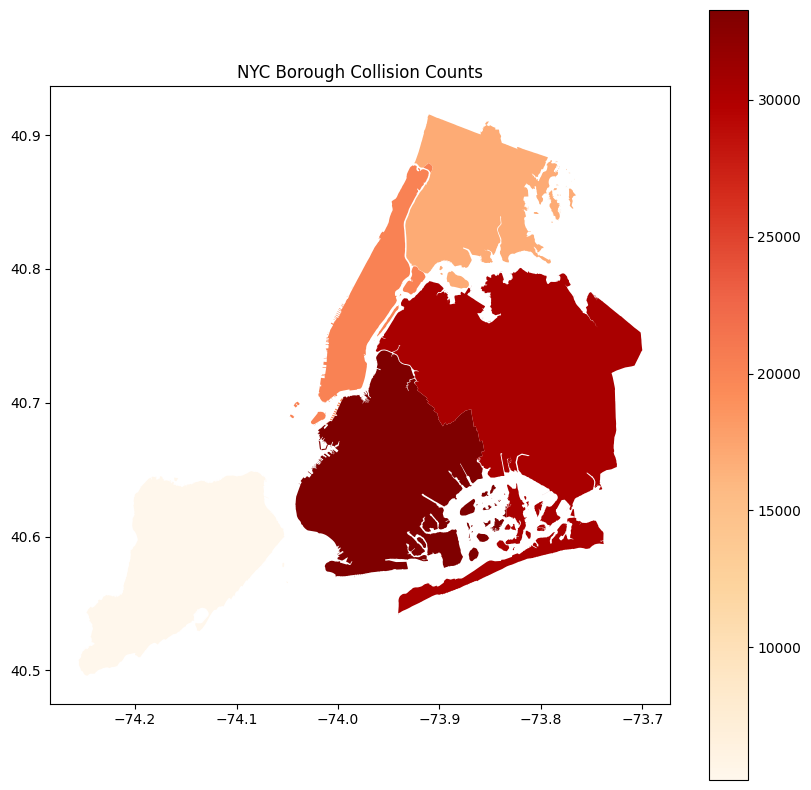

In [32]:
##### Choropleth plot #####

# Grouping by the number of unique collision ids and then finding the total number
collision_counts = df_crash_people.groupby('BOROUGH')['COLLISION_ID'].nunique().reset_index()
collision_counts.rename(columns={'BOROUGH': 'BOROUGH', 'COLLISION_ID': 'Collision Count'}, inplace=True)

collision_gdf = boroughs.merge(collision_counts, left_on='boro_name', right_on='BOROUGH', how='left')

# Just plotting it
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
collision_gdf.plot(column='Collision Count', ax=ax, legend=True, cmap='OrRd')
ax.set_title('NYC Borough Collision Counts')
plt.show()

### Month of September 2021 Death, Injury, Crash Plots

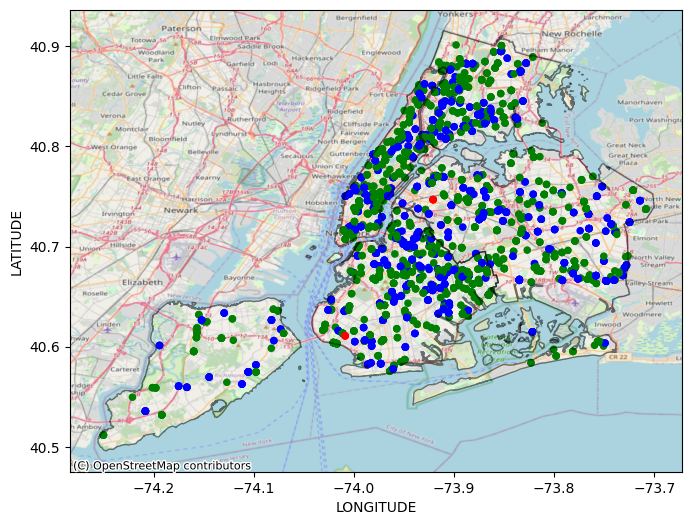

In [33]:
plot_year(df_crash_people, '2021-09-01', '2021-09-30')

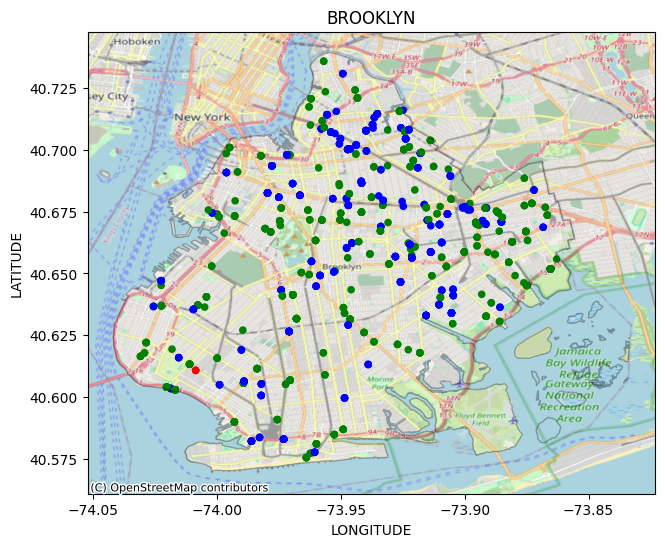

In [34]:
borough_plot(df_crash_people, '2021-09-01', '2021-09-30', 'BROOKLYN')

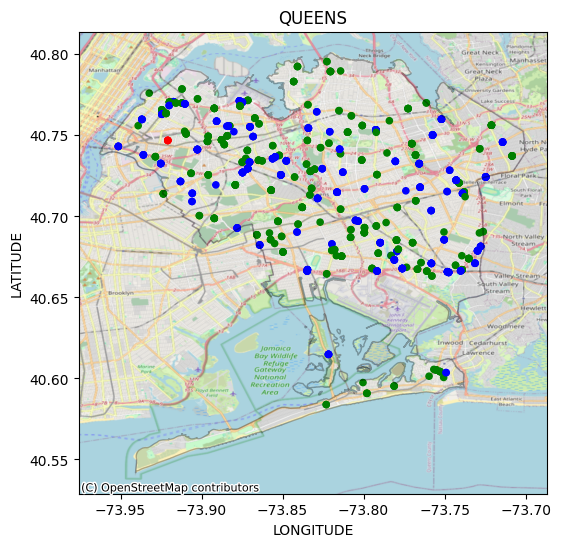

In [35]:
borough_plot(df_crash_people, '2021-09-01', '2021-09-30', 'QUEENS')

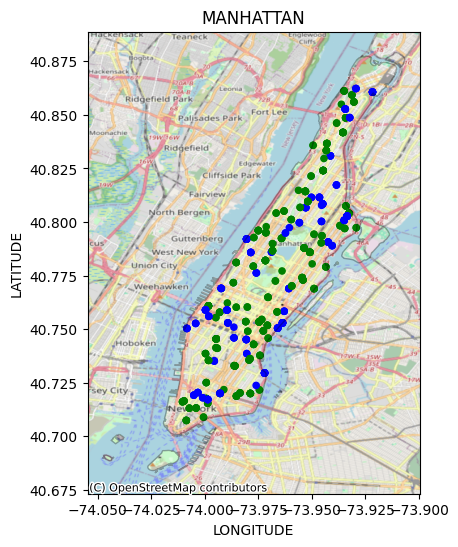

In [36]:
borough_plot(df_crash_people, '2021-09-01', '2021-09-30', 'MANHATTAN')

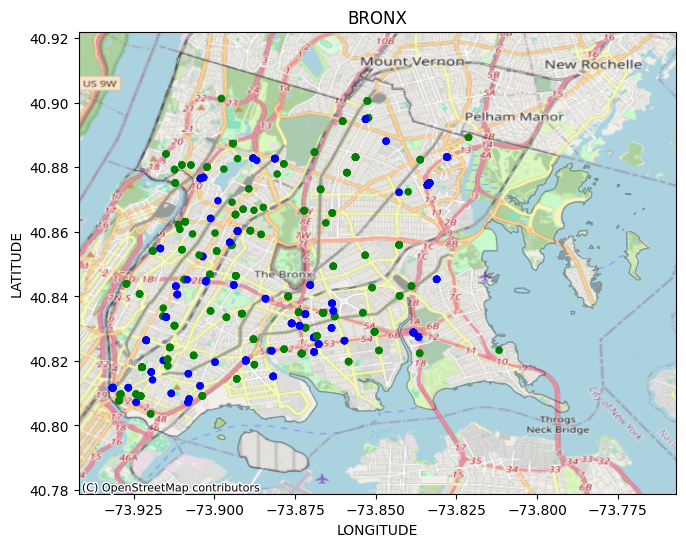

In [37]:
borough_plot(df_crash_people, '2021-09-01', '2021-09-30', 'BRONX')

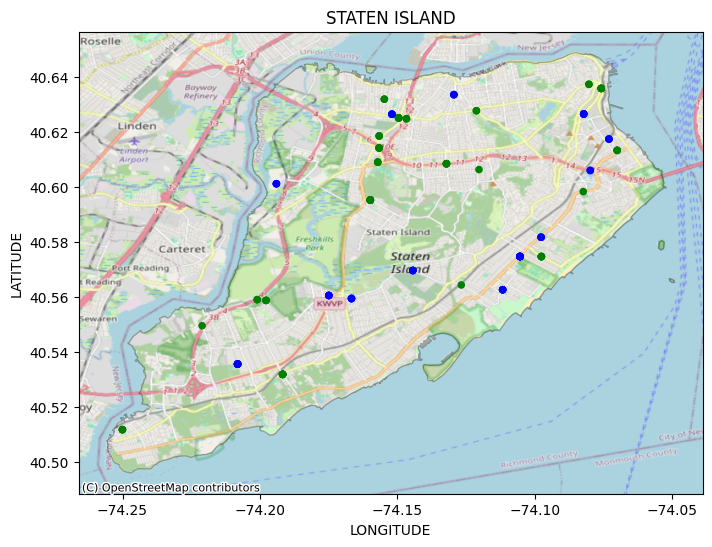

In [38]:
borough_plot(df_crash_people, '2021-09-01', '2021-09-30', 'STATEN ISLAND')

In September of 2021 we found that the borough with the most amount of crashes was BROOKLYN, followed by QUEENS, MANHATTAN, BRONX, and STATEN ISLAND. There were also only two fatal crashes in September of 2021, one in BROOKLYN and one in QUEENS with multiple crashes with injuries throughout each borough with STATEN ISLAND having the least.

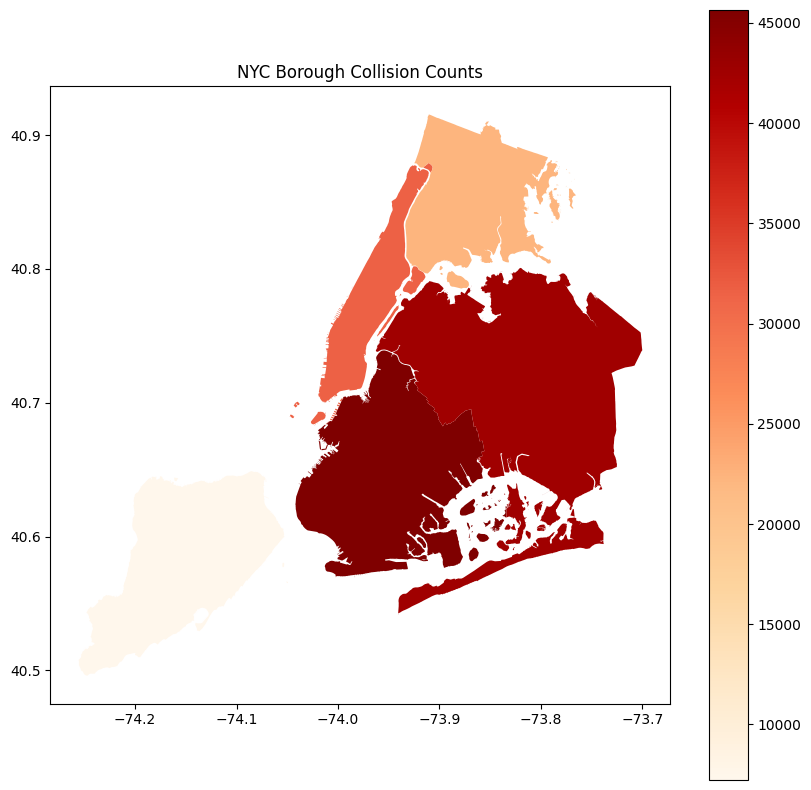

In [39]:
##### Choropleth plot #####

# Grouping by the number of unique collision ids and then finding the total number
collision_counts = df_crash_vehicle.groupby('BOROUGH')['COLLISION_ID'].nunique().reset_index()
collision_counts.rename(columns={'BOROUGH': 'BOROUGH', 'COLLISION_ID': 'Collision Count'}, inplace=True)

collision_gdf = boroughs.merge(collision_counts, left_on='boro_name', right_on='BOROUGH', how='left')

# Just plotting it
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
collision_gdf.plot(column='Collision Count', ax=ax, legend=True, cmap='OrRd')
ax.set_title('NYC Borough Collision Counts')
plt.show()

### Month of September 2022 Death, Injury, Crash Plots

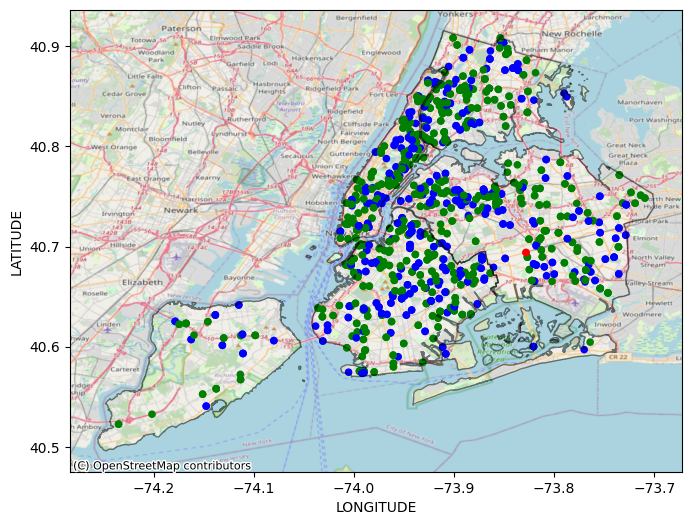

In [40]:
plot_year(df_crash_vehicle, '2022-09-01', '2022-09-30')

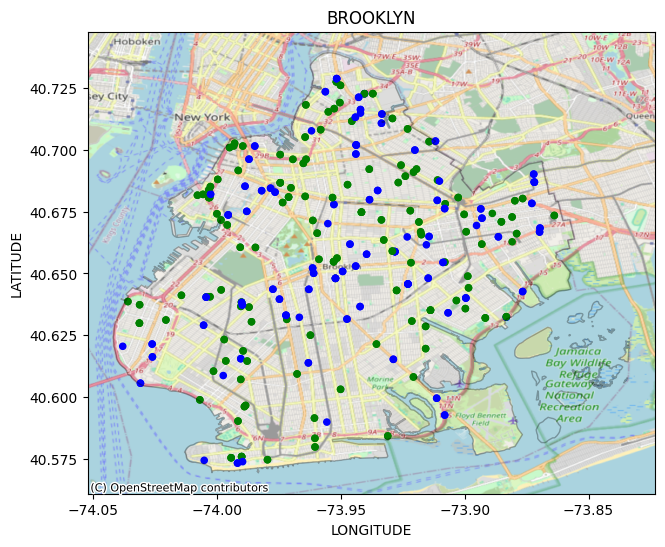

In [41]:
borough_plot(df_crash_vehicle, '2022-09-01', '2022-09-30', 'BROOKLYN')

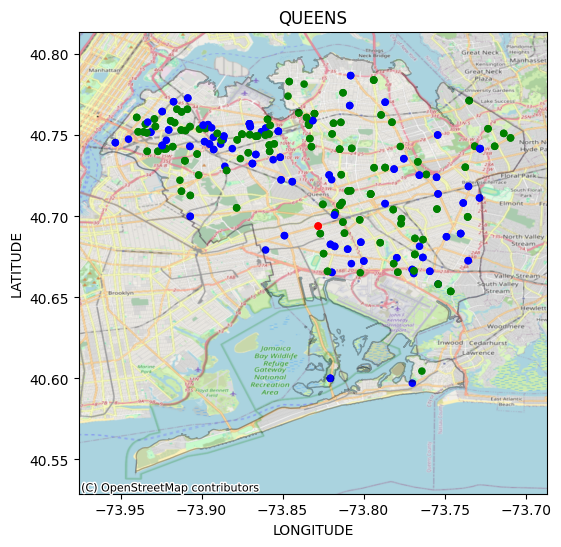

In [42]:
borough_plot(df_crash_vehicle, '2022-09-01', '2022-09-30', 'QUEENS')

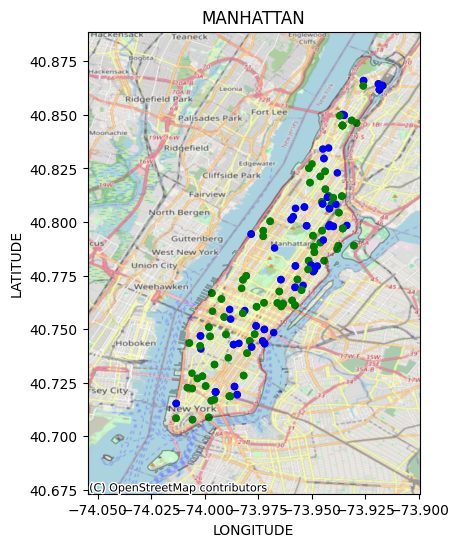

In [43]:
borough_plot(df_crash_vehicle, '2022-09-01', '2022-09-30', 'MANHATTAN')

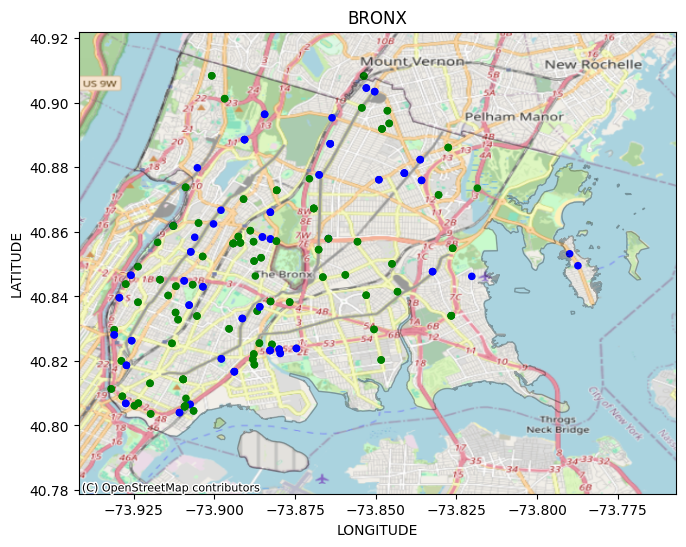

In [44]:
borough_plot(df_crash_vehicle, '2022-09-01', '2022-09-30', 'BRONX')

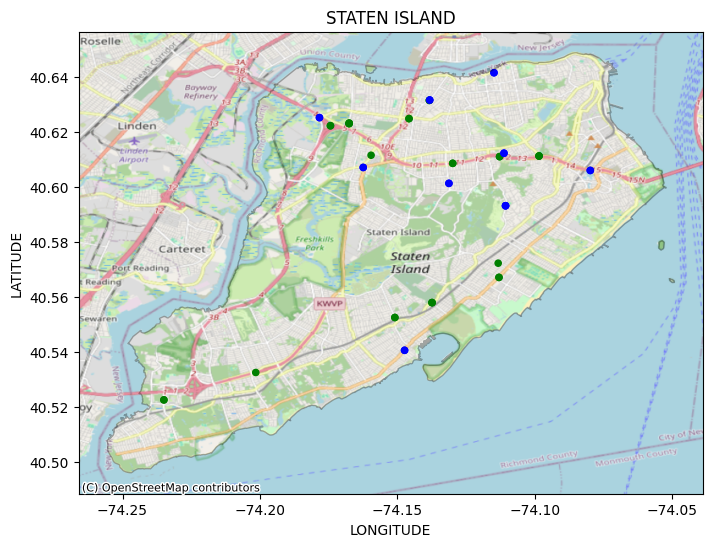

In [45]:
borough_plot(df_crash_vehicle, '2022-09-01', '2022-09-30', 'STATEN ISLAND')

In September of 2022 we found that the borough with the most amount of crashes was BROOKLYN, followed by QUEENS, MANHATTAN, BRONX, and STATEN ISLAND, matching the trend for the number of crashes in each borough from September 2021. However there were only one fatal crashes in September of 2022 in QUEENS. There are still multiple crashes with injuries throughout each borough and again STATEN ISLAND has the least.

### Most Common Factors For Accidents and Analysis on Injury and Death

In [46]:
# Found misspelling
df_crashes['CONTRIBUTING FACTOR VEHICLE 1'][df_crashes['CONTRIBUTING FACTOR VEHICLE 1'] == 'Illnes'] = 'Illness'

values_to_drop = ['Unspecified', '80', '1']

crash_factors = df_crashes.drop(df_crashes[df_crashes['CONTRIBUTING FACTOR VEHICLE 1'].isin(values_to_drop)].index, inplace=True)
crash_factors = df_crashes.groupby(['CONTRIBUTING FACTOR VEHICLE 1'])[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].agg('sum').reset_index()

crash_factors['Total Accidents'] = df_crashes.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='Num_Accidents').Num_Accidents
crash_factors = crash_factors.sort_values('Total Accidents', ascending=False)

crash_factors['% Injury'] = round((crash_factors['NUMBER OF PERSONS INJURED'] / crash_factors['Total Accidents'] * 100), 3)
crash_factors['% Killed'] = round((crash_factors['NUMBER OF PERSONS KILLED'] / crash_factors['Total Accidents'] * 100), 3)

# Filtering factors involved in atleast 100 accidents
crash_factors = crash_factors[crash_factors['Total Accidents'] > 100]
crash_factors.head(10)

CONTRIBUTING FACTOR VEHICLE 1  NUMBER OF PERSONS INJURED  \
9   Driver Inattention/Distraction                   123548.0   
16   Failure to Yield Right-of-Way                    57818.0   
19           Following Too Closely                    36105.0   
4                 Backing Unsafely                     8486.0   
29                 Other Vehicular                    14479.0   
34  Passing or Lane Usage Improper                    10447.0   
33             Passing Too Closely                     4016.0   
50              Turning Improperly                     9987.0   
17                 Fatigued/Drowsy                     9608.0   
51            Unsafe Lane Changing                     7640.0   

    NUMBER OF PERSONS KILLED  Total Accidents  % Injury  % Killed  
9                      318.0           372169    33.197     0.085  
16                     247.0           111818    51.707     0.221  
19                      21.0            94611    38.162     0.022  
4                       37.0            69906    12.139     0.053  
29                      26.0            56889    25.451     0.046  
34                      28.0            51835    20.154     0.054  
33                       2.0            48167     8.338     0.004  
50                      16.0            44141    22.625     0.036  
17                       2.0            37738    25.460     0.005  
51                      11.0            34694    22.021     0.032

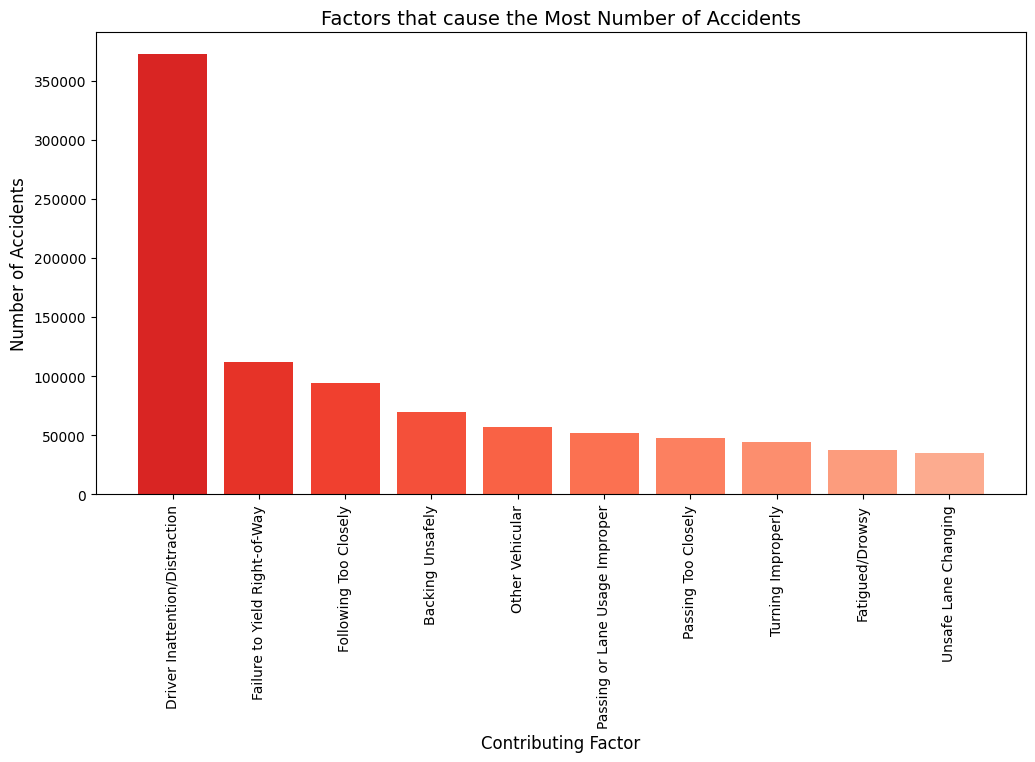

In [47]:
plt.subplots(1, figsize=(12, 6))

plt.bar(x = crash_factors.head(10)['CONTRIBUTING FACTOR VEHICLE 1'], height = crash_factors.head(10)['Total Accidents'], color = plt.cm.Reds(np.linspace(0.7, 0.3, 10)))

plt.title('Factors that cause the Most Number of Accidents', size = 14)
plt.xlabel('Contributing Factor', size = 12)
plt.ylabel('Number of Accidents', size = 12)
plt.tick_params(axis='x', labelrotation = 90)

Driver inattention/distraction tops the chart as the number one cause of accidents in New York City, with more than two times the next factor being failure to yield right-of-way.

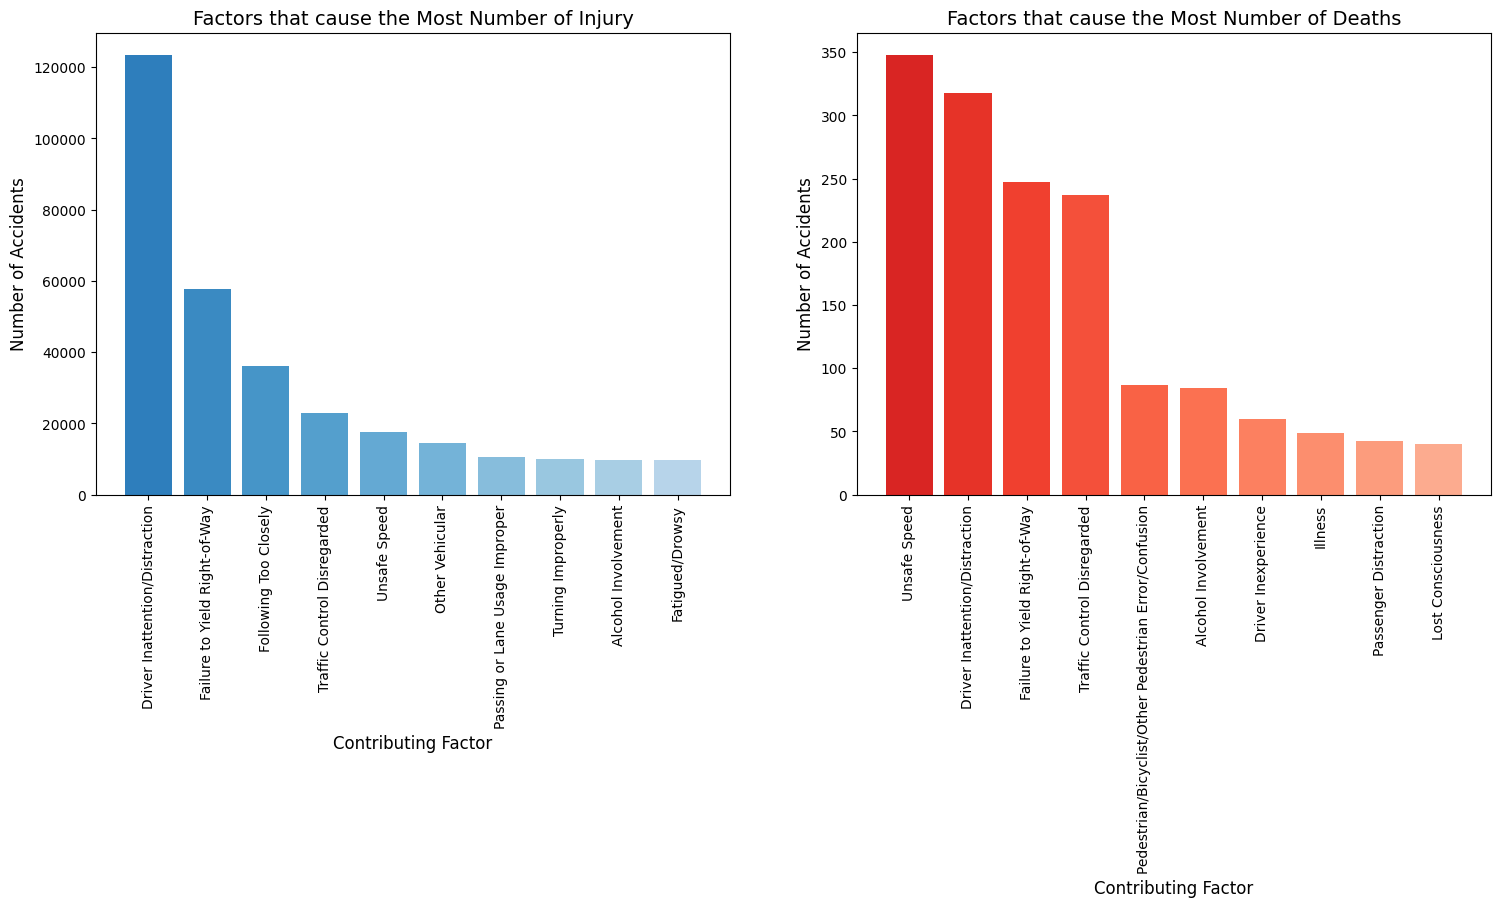

In [48]:
crash_factors_sort_injury = crash_factors.sort_values('NUMBER OF PERSONS INJURED', ascending=False)
crash_factors_sort_killed = crash_factors.sort_values('NUMBER OF PERSONS KILLED', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(x = crash_factors_sort_injury.head(10)['CONTRIBUTING FACTOR VEHICLE 1'], height = crash_factors_sort_injury.head(10)['NUMBER OF PERSONS INJURED'], color = plt.cm.Blues(np.linspace(0.7, 0.3, 10)))

axes[0].set_title('Factors that cause the Most Number of Injury', size = 14)
axes[0].set_xlabel('Contributing Factor', size = 12)
axes[0].set_ylabel('Number of Accidents', size = 12)
axes[0].tick_params(axis='x', labelrotation = 90)

axes[1].bar(x = crash_factors_sort_killed.head(10)['CONTRIBUTING FACTOR VEHICLE 1'], height = crash_factors_sort_killed.head(10)['NUMBER OF PERSONS KILLED'], color = plt.cm.Reds(np.linspace(0.7, 0.3, 10)))

axes[1].set_title('Factors that cause the Most Number of Deaths', size = 14)
axes[1].set_xlabel('Contributing Factor', size = 12)
axes[1].set_ylabel('Number of Accidents', size = 12)
axes[1].tick_params(axis='x', labelrotation = 90)

The factor that causes the most number of injuries in traffic accidents by far is driver inattention/distraction, followed by failure to yield right-of-way and following too closely. The most number of deaths are caused by unsafe speed, driver inattention/distraction,  failure to yield right-of-way, and a disregard for traffic control.

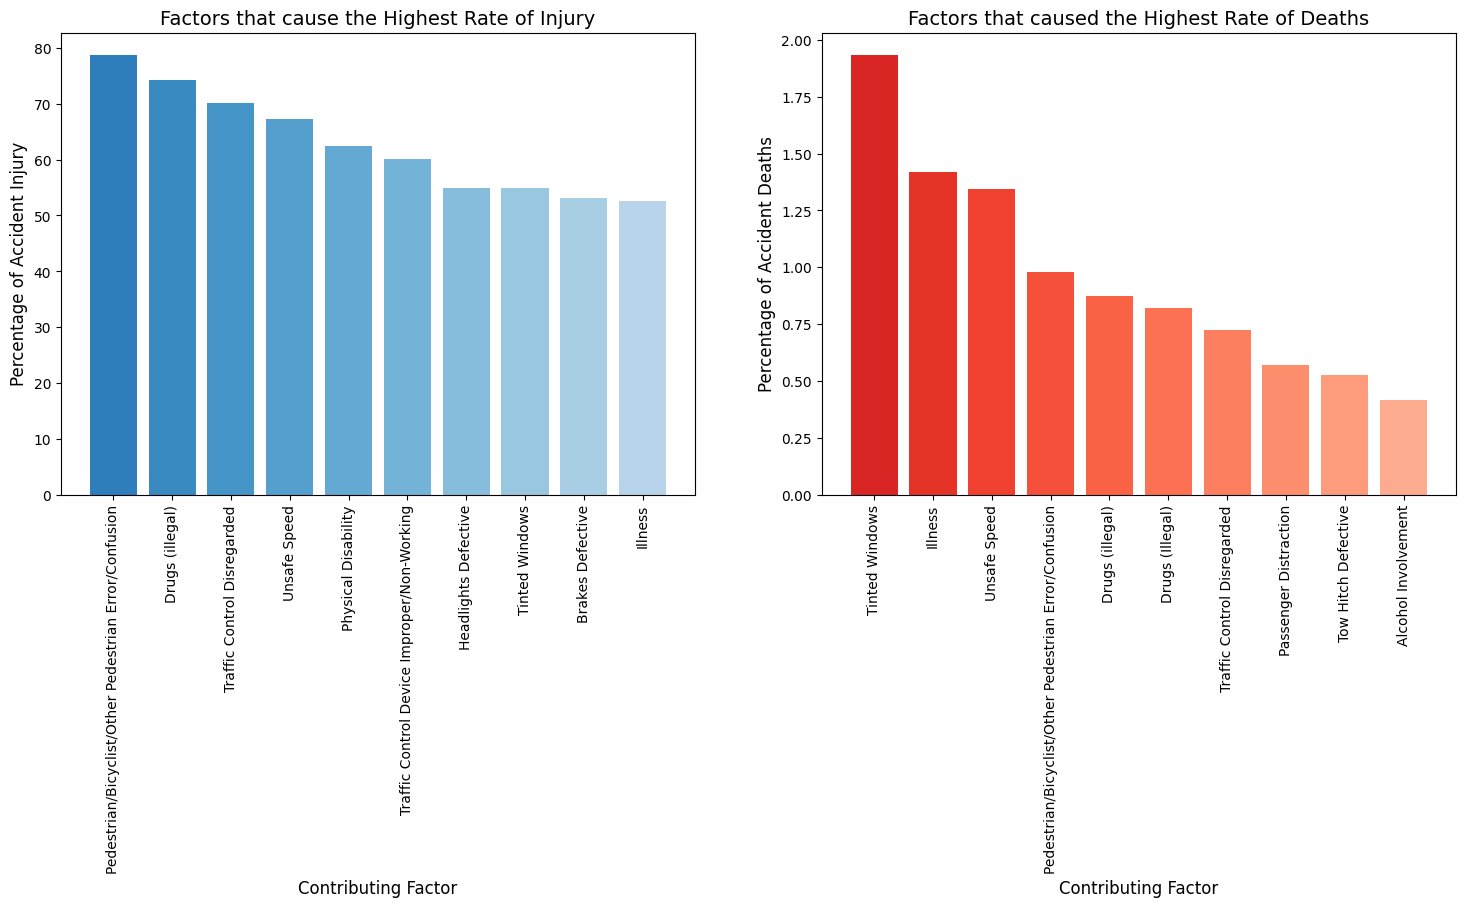

In [49]:
crash_factors_sort_perc_injury = crash_factors.sort_values('% Injury', ascending=False)
crash_factors_sort_perc_killed = crash_factors.sort_values('% Killed', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(x = crash_factors_sort_perc_injury.head(10)['CONTRIBUTING FACTOR VEHICLE 1'], height = crash_factors_sort_perc_injury.head(10)['% Injury'], color = plt.cm.Blues(np.linspace(0.7, 0.3, 10)))

axes[0].set_title('Factors that cause the Highest Rate of Injury', size = 14)
axes[0].set_xlabel('Contributing Factor', size = 12)
axes[0].set_ylabel('Percentage of Accident Injury', size = 12)
axes[0].tick_params(axis='x', labelrotation = 90)

axes[1].bar(x = crash_factors_sort_perc_killed.head(10)['CONTRIBUTING FACTOR VEHICLE 1'], height = crash_factors_sort_perc_killed.head(10)['% Killed'], color = plt.cm.Reds(np.linspace(0.7, 0.3, 10)))

axes[1].set_title('Factors that caused the Highest Rate of Deaths', size = 14)
axes[1].set_xlabel('Contributing Factor', size = 12)
axes[1].set_ylabel('Percentage of Accident Deaths', size = 12)
axes[1].tick_params(axis='x', labelrotation = 90)

Factors that have the highest rate of injury include pedestrian/bicyclist/other pedestrian error/confusion, drugs (illegal), a disregard for traffic control, and unsafe speed. We can see that people who are not inside vehicles and or on drugs are more prone to injury. Vehicles that disregard traffic or speed are also top factors with high rates of injury. The factors that cause the highest rate of death in New York City include tinted windows, illness, and unsafe speed.

### Most Common Vehicles in Accidents and Analysis on Injury and Death

In [50]:
# to account for different cases A vs a and overlapping name spellings
df_crashes['VEHICLE TYPE CODE 1'] = df_crashes['VEHICLE TYPE CODE 1'].str.lower()
df_crashes['VEHICLE TYPE CODE 1'][df_crashes['VEHICLE TYPE CODE 1'] == 'sport utility / station wagon'] = 'station wagon/sport utility vehicle'

vehicle_in_crash = df_crashes.groupby(['VEHICLE TYPE CODE 1'])[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].agg('sum').reset_index()

vehicle_in_crash['Total Accidents'] = df_crashes.groupby(['VEHICLE TYPE CODE 1']).size().reset_index(name='Num_Accidents').Num_Accidents
vehicle_in_crash = vehicle_in_crash.sort_values('Total Accidents', ascending=False)

vehicle_in_crash['% Injury'] = round((vehicle_in_crash['NUMBER OF PERSONS INJURED'] / vehicle_in_crash['Total Accidents'] * 100), 3)
vehicle_in_crash['% Killed'] = round((vehicle_in_crash['NUMBER OF PERSONS KILLED'] / vehicle_in_crash['Total Accidents'] * 100), 3)

# Filtering vehicles involved in atleast 100 accidents
vehicle_in_crash = vehicle_in_crash[vehicle_in_crash['Total Accidents'] > 100]
vehicle_in_crash.head(10)

VEHICLE TYPE CODE 1  NUMBER OF PERSONS INJURED  \
653                                sedan                   145110.0   
693  station wagon/sport utility vehicle                   132052.0   
556                    passenger vehicle                    43276.0   
718                                 taxi                    18356.0   
570                        pick-up truck                     7268.0   
106                                  bus                     6535.0   
27                            4 dr sedan                     6171.0   
94                             box truck                     3015.0   
822                                  van                     4123.0   
79                                  bike                     8799.0   

     NUMBER OF PERSONS KILLED  Total Accidents  % Injury  % Killed  
653                     441.0           395459    36.694     0.112  
693                     471.0           392389    33.653     0.120  
556                     199.0           155994    27.742     0.128  
718                      40.0            55951    32.807     0.071  
570                      48.0            29356    24.758     0.164  
106                      53.0            21321    30.651     0.249  
27                       17.0            20639    29.900     0.082  
94                       33.0            18615    16.197     0.177  
822                      28.0            18108    22.769     0.155  
79                       27.0            10075    87.335     0.268

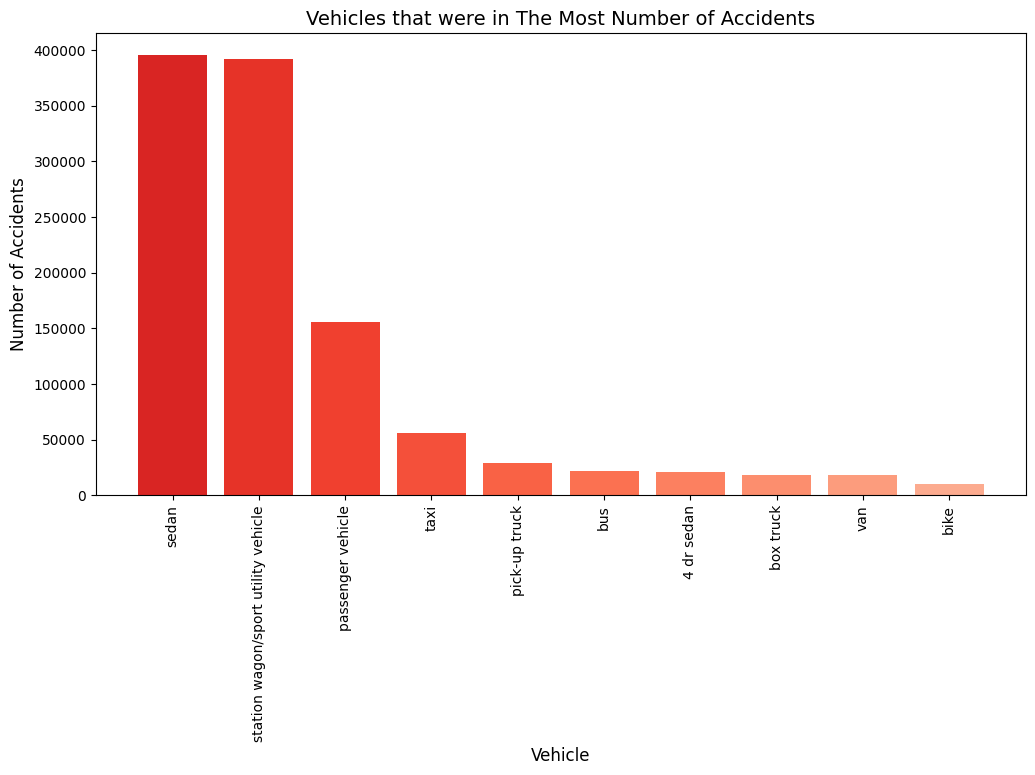

In [51]:
plt.subplots(1, figsize=(12, 6))

plt.bar(x = vehicle_in_crash.head(10)['VEHICLE TYPE CODE 1'], height = vehicle_in_crash.head(10)['Total Accidents'], color = plt.cm.Reds(np.linspace(0.7, 0.3, 10)))

plt.title('Vehicles that were in The Most Number of Accidents', size = 14)
plt.xlabel('Vehicle', size = 12)
plt.ylabel('Number of Accidents', size = 12)
plt.tick_params(axis='x', labelrotation = 90)

Sedans, station wagons/sport utility vehicles, passenger vehicles, and taxis are involved in the most amount of traffic accidents within New York City.

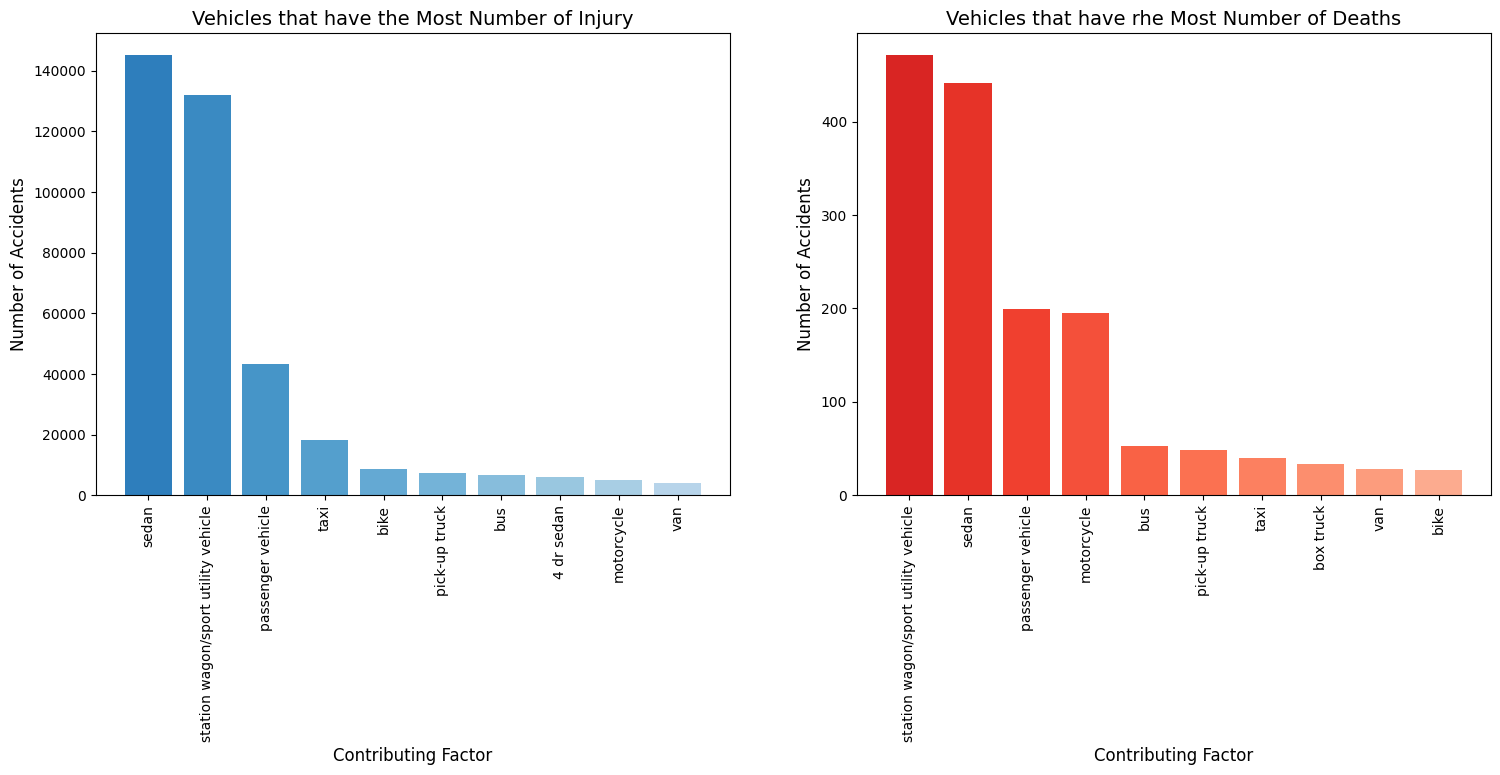

In [52]:
vehicle_in_crash_sort_injury = vehicle_in_crash.sort_values('NUMBER OF PERSONS INJURED', ascending=False)
vehicle_in_crash_sort_killed = vehicle_in_crash.sort_values('NUMBER OF PERSONS KILLED', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(x = vehicle_in_crash_sort_injury.head(10)['VEHICLE TYPE CODE 1'], height = vehicle_in_crash_sort_injury.head(10)['NUMBER OF PERSONS INJURED'], color = plt.cm.Blues(np.linspace(0.7, 0.3, 10)))

axes[0].set_title('Vehicles that have the Most Number of Injury', size = 14)
axes[0].set_xlabel('Contributing Factor', size = 12)
axes[0].set_ylabel('Number of Accidents', size = 12)
axes[0].tick_params(axis='x', labelrotation = 90)

axes[1].bar(x = vehicle_in_crash_sort_killed.head(10)['VEHICLE TYPE CODE 1'], height = vehicle_in_crash_sort_killed.head(10)['NUMBER OF PERSONS KILLED'], color = plt.cm.Reds(np.linspace(0.7, 0.3, 10)))

axes[1].set_title('Vehicles that have rhe Most Number of Deaths', size = 14)
axes[1].set_xlabel('Contributing Factor', size = 12)
axes[1].set_ylabel('Number of Accidents', size = 12)
axes[1].tick_params(axis='x', labelrotation = 90)

Sedans, station wagons/sport utility vehicles, passenger vehicles, and taxis are the vehicles that have the highest number of injuries in traffic accidents in New York City. The same vehicles, including motorcycles, top the top 10 in the number of deaths in traffic accidents.

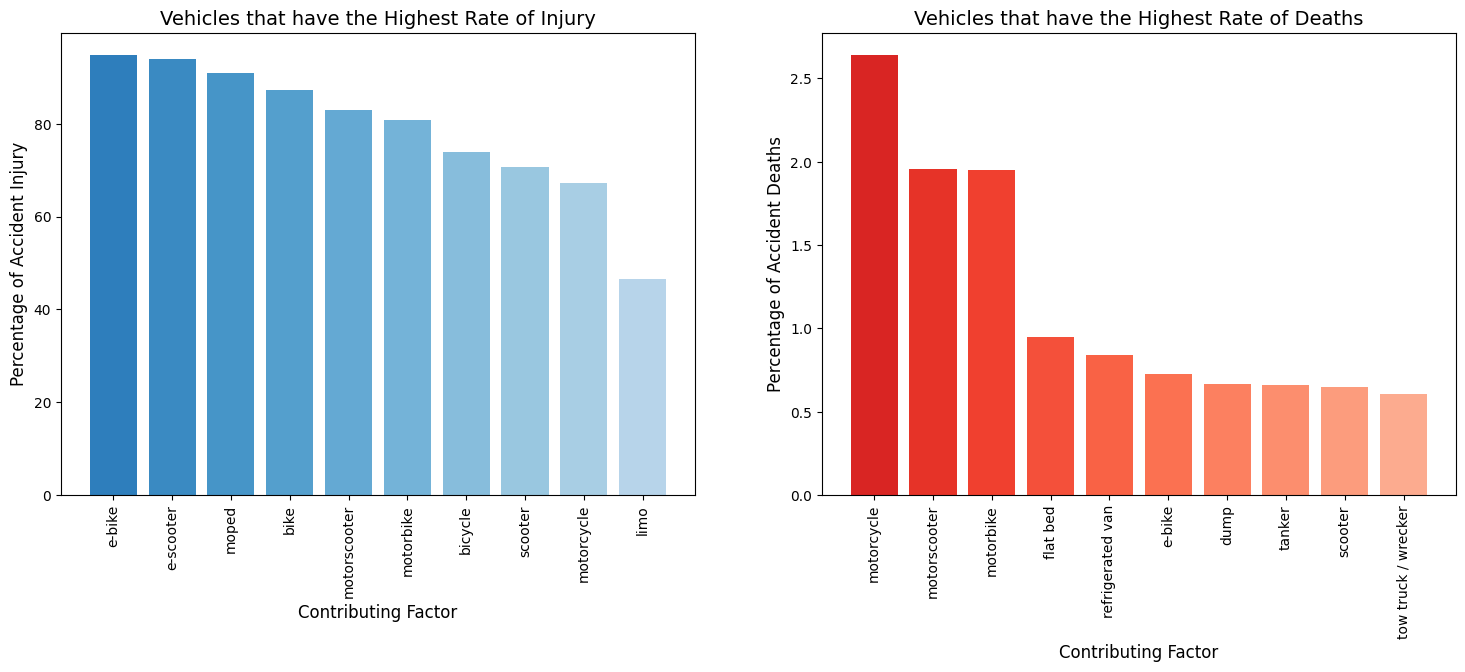

In [53]:
vehicle_in_crash_sort_perc_injury = vehicle_in_crash.sort_values('% Injury', ascending=False)
vehicle_in_crash_sort_perc_killed = vehicle_in_crash.sort_values('% Killed', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(x = vehicle_in_crash_sort_perc_injury.head(10)['VEHICLE TYPE CODE 1'], height = vehicle_in_crash_sort_perc_injury.head(10)['% Injury'], color = plt.cm.Blues(np.linspace(0.7, 0.3, 10)))

axes[0].set_title('Vehicles that have the Highest Rate of Injury', size = 14)
axes[0].set_xlabel('Contributing Factor', size = 12)
axes[0].set_ylabel('Percentage of Accident Injury', size = 12)
axes[0].tick_params(axis='x', labelrotation = 90)

axes[1].bar(x = vehicle_in_crash_sort_perc_killed.head(10)['VEHICLE TYPE CODE 1'], height = vehicle_in_crash_sort_perc_killed.head(10)['% Killed'], color = plt.cm.Reds(np.linspace(0.7, 0.3, 10)))

axes[1].set_title('Vehicles that have the Highest Rate of Deaths', size = 14)
axes[1].set_xlabel('Contributing Factor', size = 12)
axes[1].set_ylabel('Percentage of Accident Deaths', size = 12)
axes[1].tick_params(axis='x', labelrotation = 90)

Two-wheeled vehicles such as e-bikes, e-scooters, mopeds, and bikes have a higher than 80% injury rate. It can be concluded from the plot that two-wheeled vehicles are prone to injury if and when they are involved in a traffic accident in New York City. We also find that motorcycles, motorscooters, and motorbikes have the highest rate of death when involved in an accident.

### Analysis on the People involved in the traffic accidents

In [54]:
# FOR JARED use the df_crash_people, this is the dataframe for crash + people
# Goal is to make 3-5 plots of anything that you think is important and then add a markdown cell for Sections and descriptions of what you find
df_crash_people.head()

CRASH_DATE CRASH_TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0 2014-06-13   12:45:00   BROOKLYN      NaN  40.712803 -73.954162   
1 2014-06-13   12:45:00   BROOKLYN      NaN  40.712803 -73.954162   
2 2014-06-13   12:45:00   BROOKLYN      NaN  40.712803 -73.954162   
3 2015-02-01   01:11:00   BROOKLYN    11201  40.689631 -73.985739   
4 2019-05-16   00:15:00  MANHATTAN      NaN  40.702824 -74.008110   

                    LOCATION                    ON STREET NAME  \
0   (40.7128032, -73.954162)                               NaN   
1   (40.7128032, -73.954162)                               NaN   
2   (40.7128032, -73.954162)                               NaN   
3  (40.6896312, -73.9857387)  LIVINGSTON STREET                  
4     (40.702824, -74.00811)  FDR DRIVE                          

                  CROSS STREET NAME  NUMBER OF PERSONS INJURED  ...  \
0                               NaN                        3.0  ...   
1                               NaN                        3.0  ...   
2                               NaN                        3.0  ...   
3  HOYT STREET                                             1.0  ...   
4                               NaN                        0.0  ...   

   PERSON_TYPE  PERSON_INJURY  PERSON_AGE  EJECTION  POSITION_IN_VEHICLE  \
0     Occupant        Injured        32.0       NaN                  NaN   
1     Occupant        Injured        26.0       NaN                  NaN   
2     Occupant        Injured        30.0       NaN                  NaN   
3   Pedestrian        Injured        51.0       NaN                  NaN   
4     Occupant    Unspecified         0.0       NaN                  NaN   

   SAFETY_EQUIPMENT  PED_LOCATION PED_ACTION    PED_ROLE  PERSON_SEX  
0               NaN           NaN        NaN         NaN         NaN  
1               NaN           NaN        NaN         NaN         NaN  
2               NaN           NaN        NaN         NaN         NaN  
3               NaN           NaN        NaN         NaN         NaN  
4               NaN           NaN        NaN  Registrant           U  

[5 rows x 33 columns]

In [55]:
df_crash_people.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'UNIQUE_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'PERSON_AGE', 'EJECTION',
       'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION',
       'PED_ROLE', 'PERSON_SEX'],
      dtype='object')

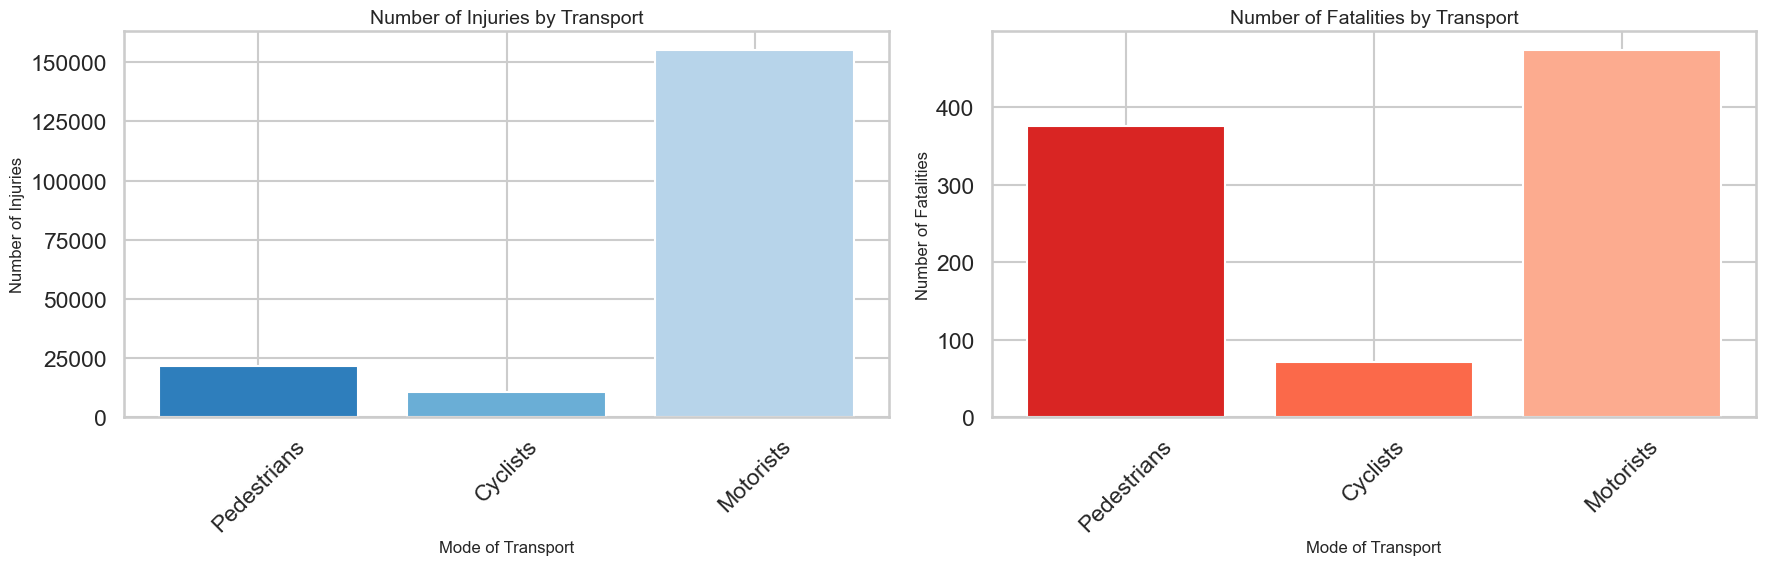

In [56]:
sns.set_style("whitegrid")
sns.set_context("talk")

# Data preparation for injuries and fatalities
categories = ['Pedestrians', 'Cyclists', 'Motorists']
injuries = [
    df_crash_people['NUMBER OF PEDESTRIANS INJURED'].sum(),
    df_crash_people['NUMBER OF CYCLIST INJURED'].sum(),
    df_crash_people['NUMBER OF MOTORIST INJURED'].sum()
]
fatalities = [
    df_crash_people['NUMBER OF PEDESTRIANS KILLED'].sum(),
    df_crash_people['NUMBER OF CYCLIST KILLED'].sum(),
    df_crash_people['NUMBER OF MOTORIST KILLED'].sum()
]

# Creating side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Injuries bar chart with color gradient
colors_injury = plt.cm.Blues(np.linspace(0.7, 0.3, len(categories)))
axes[0].bar(categories, injuries, color=colors_injury)
axes[0].set_title('Number of Injuries by Transport', fontsize=14)
axes[0].set_xlabel('Mode of Transport', fontsize=12)
axes[0].set_ylabel('Number of Injuries', fontsize=12)

# Fatalities bar chart with color gradient
colors_killed = plt.cm.Reds(np.linspace(0.7, 0.3, len(categories)))
axes[1].bar(categories, fatalities, color=colors_killed)
axes[1].set_title('Number of Fatalities by Transport', fontsize=14)
axes[1].set_xlabel('Mode of Transport', fontsize=12)
axes[1].set_ylabel('Number of Fatalities', fontsize=12)


for ax in axes:
    ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()


The bar charts indicate that while motorists experience the highest number of injuries, pedestrians face a disproportionately higher risk of fatalities, likely due to their vulnerability without protective measures compared to those in vehicles.

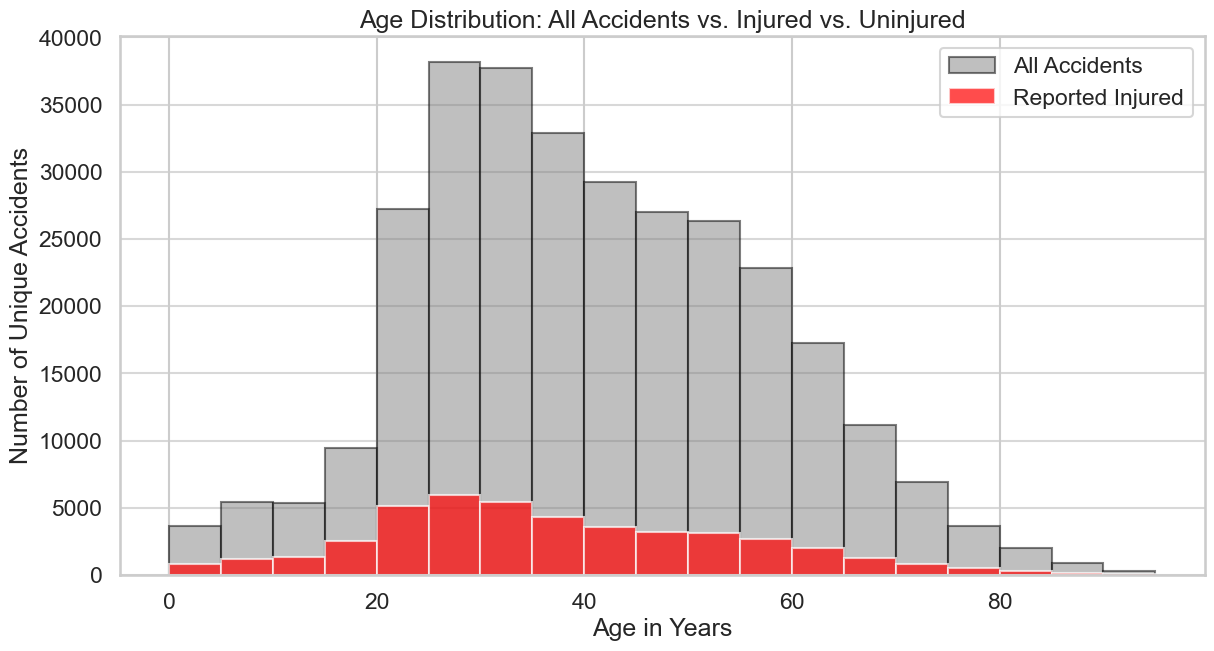

In [57]:
# remove null values
valid_age_data = df_crash_people['PERSON_AGE'].dropna()
valid_age_data = valid_age_data[valid_age_data > 0]

injured = df_crash_people[(df_crash_people['PERSON_INJURY'] == 'Injured') & (df_crash_people['PERSON_AGE'] > 0)]['PERSON_AGE']

plt.figure(figsize=(14, 7))

# First histogram: Age distribution of all unique accidents (in the background)
plt.hist(valid_age_data, bins=range(0, 100, 5), color='gray', edgecolor='black', alpha=0.5, label='All Accidents')

# Second histogram: Stacked histogram for injured vs. uninjured
plt.hist([injured], bins=range(0, 100, 5), stacked=True, label=['Reported Injured'] , color=['red'], alpha=0.7)

# Set title and labels
plt.title('Age Distribution: All Accidents vs. Injured vs. Uninjured')
plt.xlabel('Age in Years')
plt.ylabel('Number of Unique Accidents')
plt.legend()

plt.grid(axis='y', alpha=0.75)
plt.show()


The histogram displays the age distribution of individuals involved in all reported accidents, with a subset highlighted for those who were injured. The peak of accidents and injuries occurs in the mid-age range, with a noticeable decline in both accidents and injuries as age increases. This could suggest that middle-aged individuals are more frequently involved in accidents, or it might reflect the population distribution of active drivers.

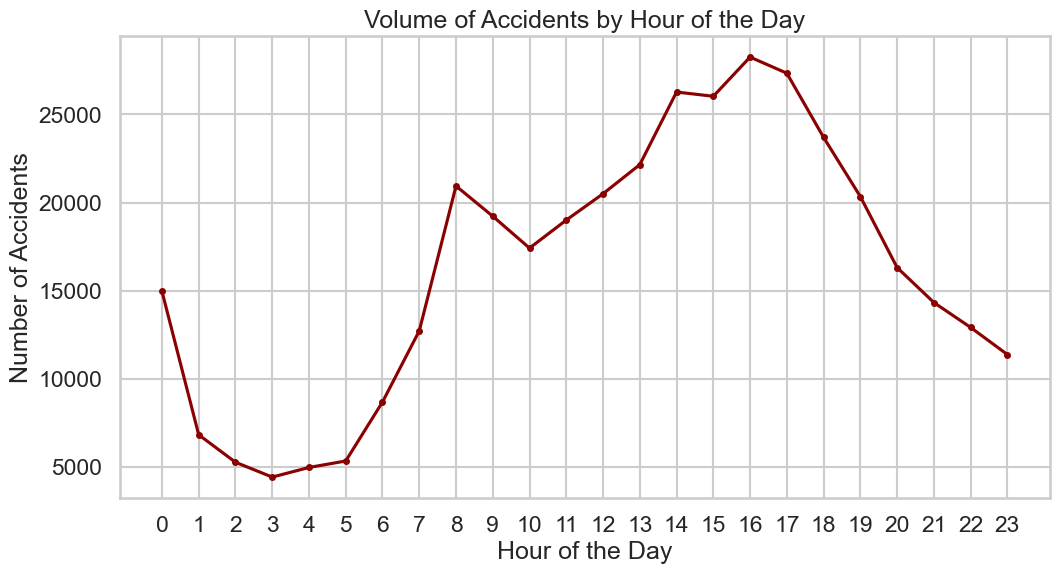

In [58]:
# set the time value to be able to apply by the hour measurments
def extract_hour(time_val):
    if pd.isnull(time_val):
        return None 
    try:
        return pd.to_datetime(time_val, format='%H:%M').hour
    except Exception:
        try:
            return time_val.hour
        except Exception:
            return None

# Apply extract_hour to the CRASH_TIME column
df_crash_people['CRASH_HOUR'] = df_crash_people['CRASH_TIME'].apply(extract_hour)

# Continue with the aggregation and plotting
accidents_by_hour = df_crash_people.groupby('CRASH_HOUR').size()

plt.figure(figsize=(12, 6))
accidents_by_hour.plot(color='darkred', linestyle='-', marker='o', markersize=4)
plt.title('Volume of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24)) # Ensure all hours are shown
plt.grid(True)
plt.show()


The line graph depicts the volume of accidents by hour of the day, showing two prominent peaks—one in the late morning and another in the late afternoon to early evening—likely correlating with rush hour traffic. The sharp decrease in accidents during the early morning hours suggests significantly lower traffic volumes during these times.

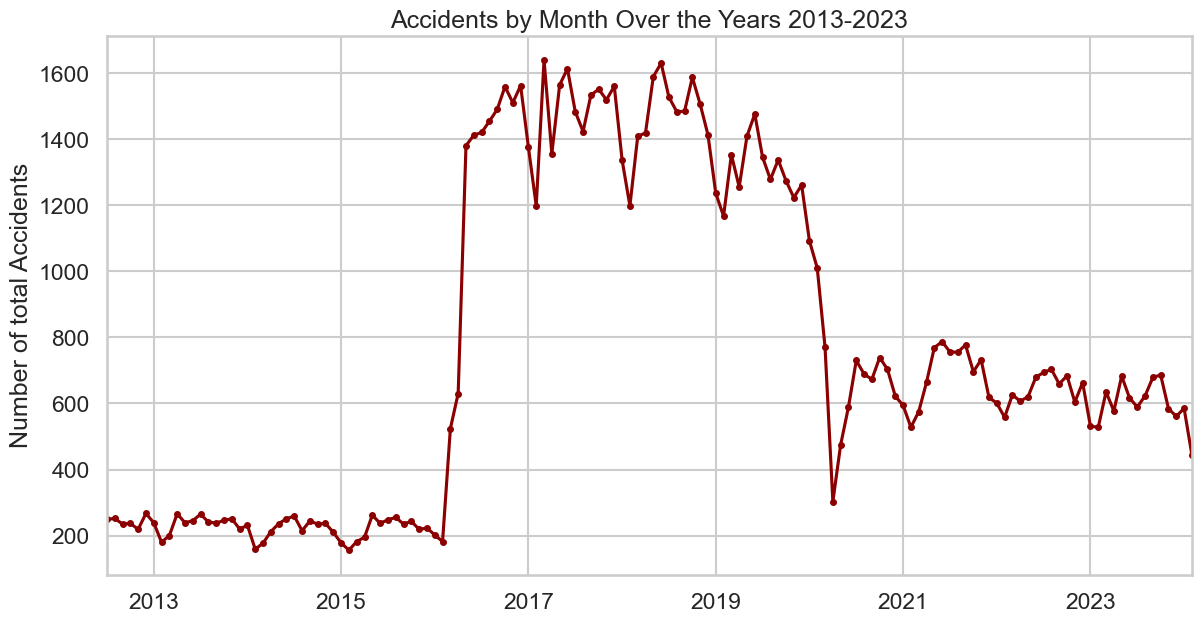

In [59]:
# Ensure both CRASH_DATE and CRASH_TIME are strings
df_crash_people['CRASH_DATE_STR'] = df_crash_people['CRASH_DATE'].astype(str)
df_crash_people['CRASH_TIME_STR'] = df_crash_people['CRASH_TIME'].astype(str)

# Now concatenate the date and time strings and convert to datetime
df_crash_people['CRASH_DATETIME'] = pd.to_datetime(df_crash_people['CRASH_DATE_STR'] + ' ' + df_crash_people['CRASH_TIME_STR'])

# Set the new datetime column as the index
df_crash_people.set_index('CRASH_DATETIME', inplace=True)

# Resample to count the number of unique 'COLLISION_ID' by month
accidents_by_month = df_crash_people.resample('M').nunique()['COLLISION_ID']

# Plotting
plt.figure(figsize=(14, 7))
accidents_by_month.plot(color='darkred', linestyle='-', marker='o', markersize=4)
plt.title('Accidents by Month Over the Years 2013-2023')
plt.xlabel('')
plt.ylabel('Number of total Accidents')
plt.grid(True)
plt.show()


The line graph shows a time series of the number of accidents per month over several years. There is a noticeable trend of fluctuation, with peaks that could correspond to seasonal variations. Notably, there is a significant drop in the number of accidents in the most recent years, which might indicate the impact of new safety measures, changes in traffic patterns, or external factors such as the COVID-19 pandemic.

### Analysis on the Vehicles involved in the traffic accidents

In [60]:
# FOR SUNG use the df_crash_vehicle, this is the dataframe for crash + vehicles
# Goal is to make 3-5 plots of anything that you think is important and then add a markdown cell for Sections and descriptions of what you find
df_crash_vehicle.head()

CRASH_DATE CRASH_TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0 2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   
1 2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   
2 2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   
3 2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   
4 2014-06-13   12:45:00  BROOKLYN      NaN  40.712803 -73.954162   

                   LOCATION ON STREET NAME CROSS STREET NAME  \
0  (40.7128032, -73.954162)            NaN               NaN   
1  (40.7128032, -73.954162)            NaN               NaN   
2  (40.7128032, -73.954162)            NaN               NaN   
3  (40.7128032, -73.954162)            NaN               NaN   
4  (40.7128032, -73.954162)            NaN               NaN   

   NUMBER OF PERSONS INJURED  ...  VEHICLE_OCCUPANTS  DRIVER_SEX  \
0                        3.0  ...                NaN         NaN   
1                        3.0  ...                NaN         NaN   
2                        3.0  ...                NaN         NaN   
3                        3.0  ...                NaN         NaN   
4                        3.0  ...                NaN         NaN   

   DRIVER_LICENSE_STATUS  DRIVER_LICENSE_JURISDICTION             PRE_CRASH  \
0                    NaN                          NaN  Going Straight Ahead   
1                    NaN                          NaN  Going Straight Ahead   
2                    NaN                          NaN  Going Straight Ahead   
3                    NaN                          NaN  Going Straight Ahead   
4                    NaN                          NaN  Going Straight Ahead   

   POINT_OF_IMPACT  VEHICLE_DAMAGE PUBLIC_PROPERTY_DAMAGE  \
0              NaN             NaN                    NaN   
1              NaN             NaN                    NaN   
2              NaN             NaN                    NaN   
3              NaN             NaN                    NaN   
4              NaN             NaN                    NaN   

  CONTRIBUTING_FACTOR_1  CONTRIBUTING_FACTOR_2  
0   Alcohol Involvement                    NaN  
1           Unspecified                    NaN  
2       Fatigued/Drowsy                    NaN  
3   Alcohol Involvement                    NaN  
4       Fatigued/Drowsy                    NaN  

[5 rows x 38 columns]

In [61]:
df_crash_vehicle.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'UNIQUE_ID', 'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'PUBLIC_PROPERTY_DAMAGE',
       'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2'],
      dtype='object')

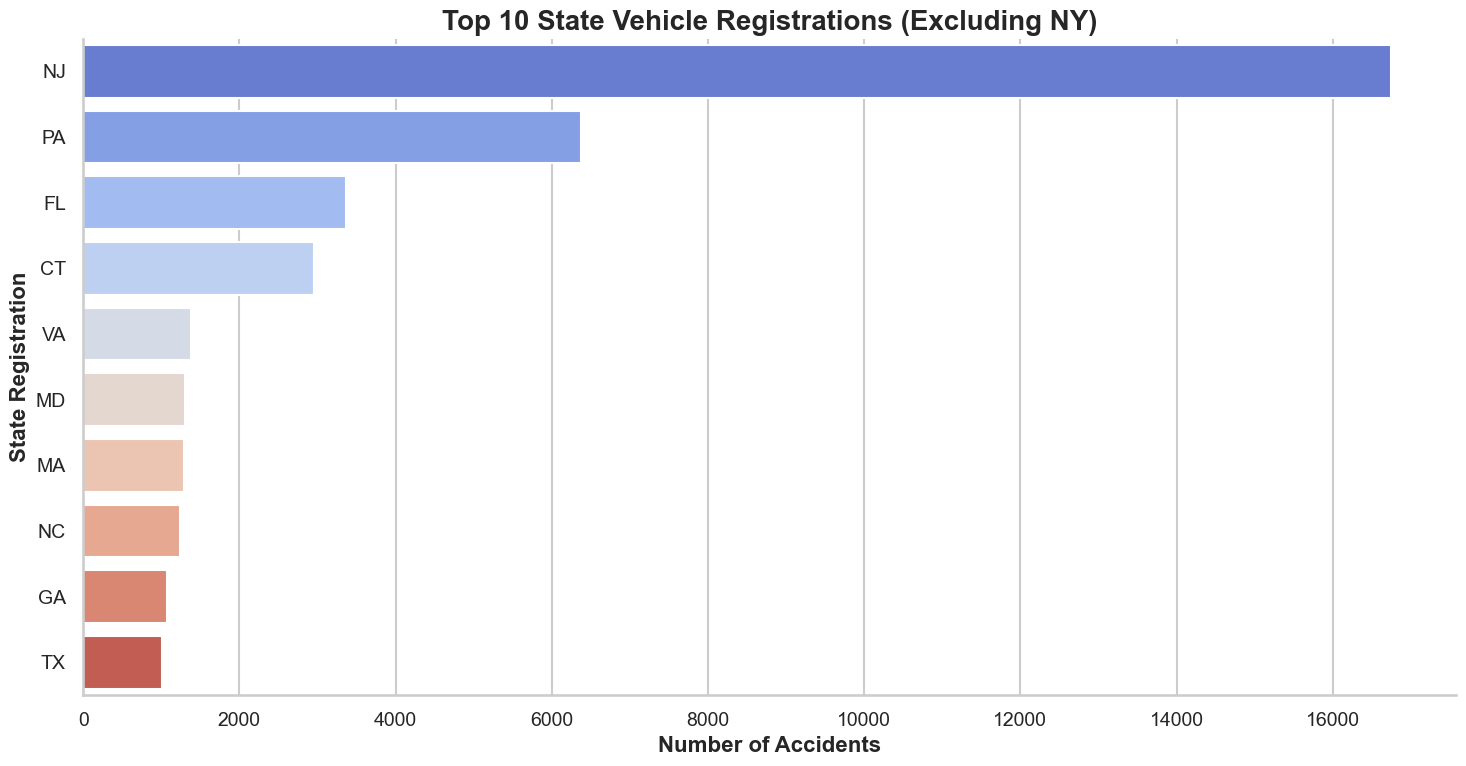

In [62]:
filtered_data = df_crash_vehicle[(df_crash_vehicle['STATE_REGISTRATION'] != 'NY') & (df_crash_vehicle['STATE_REGISTRATION'].notnull())]

top_states_registration = filtered_data['STATE_REGISTRATION'].value_counts().head(10)

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(15, 8))
sns.barplot(y=top_states_registration.index, x=top_states_registration.values, palette="coolwarm")

plt.title('Top 10 State Vehicle Registrations (Excluding NY)', fontsize=20, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=16, fontweight='bold')
plt.ylabel('State Registration', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

The graph shows that the vehicles has registration of New Jersey (NJ) has the highest number of accidents among the states listed, significantly more than the others.

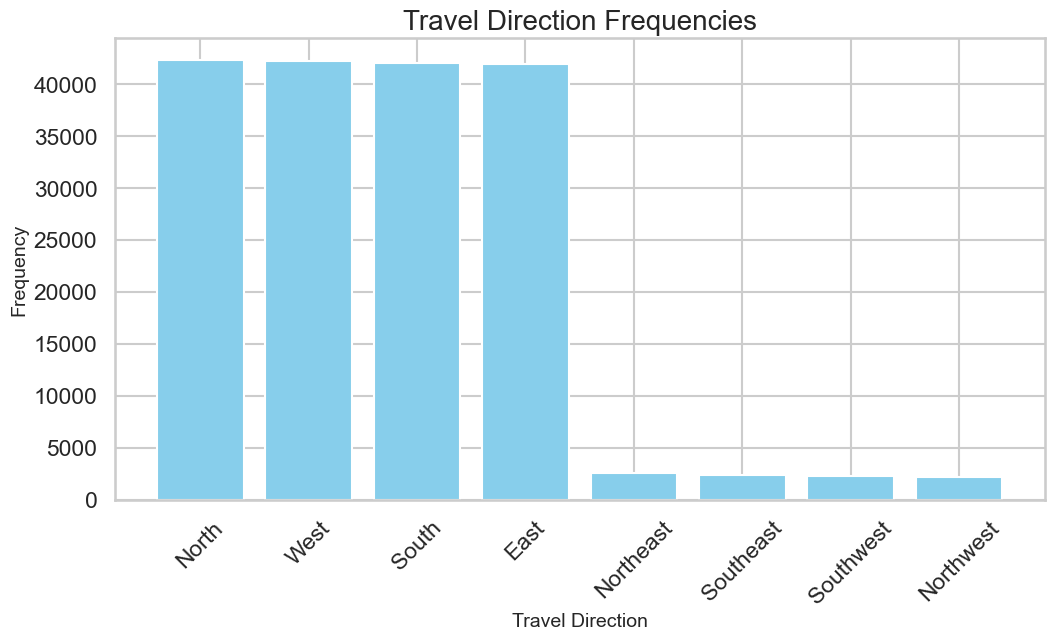

In [63]:
travel_direction_counts = df_crash_vehicle['TRAVEL_DIRECTION'].dropna().value_counts().reset_index()
travel_direction_counts = travel_direction_counts[travel_direction_counts['TRAVEL_DIRECTION'] != 'Unknown']
filtered_travel_direction_counts = travel_direction_counts[travel_direction_counts['count'] > 100]

plt.subplots(1, figsize=(12, 6))

plt.bar(x=filtered_travel_direction_counts['TRAVEL_DIRECTION'], height=filtered_travel_direction_counts['count'], color='skyblue')

plt.title('Travel Direction Frequencies', size = 20)
plt.xlabel('Travel Direction', size = 14)
plt.ylabel('Frequency', size = 14)
plt.tick_params(axis='x', labelrotation = 45)

The four cardinal directions(North, West, South, and East) have similar frequencies, each falling in the range between approximately 30,000 and 40,000. None of these directions significantly outnumbers the others, suggesting a relatively even distribution of travel in these cardinal directions. The bar graph also suggest that travel tends to be more straightforward which makes sense in New York city where the routes are typically laid out along the cardinal directions.

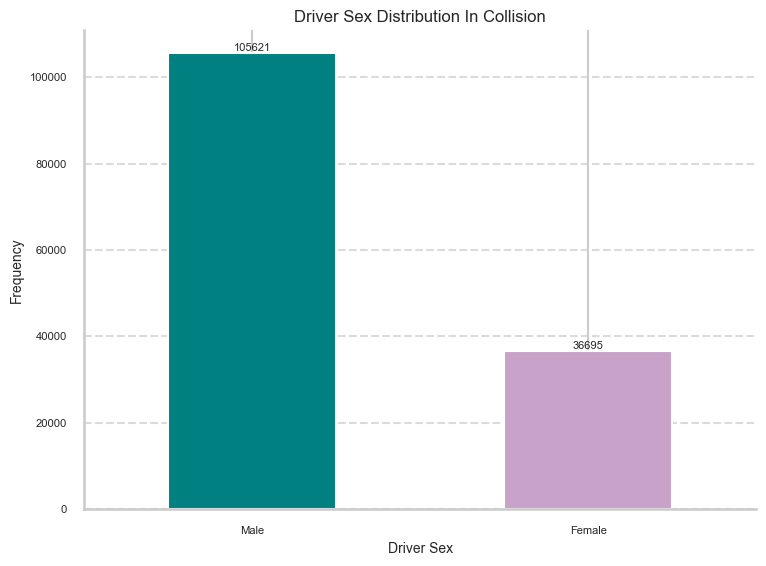

In [64]:
driver_sex_counts = df_crash_vehicle['DRIVER_SEX'].dropna().value_counts()[:-1]

new_labels = ['Male', 'Female'] 

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(8, 6))
driver_sex_counts.plot(kind='bar', color=['#008080', '#C8A2C8']) 
plt.title('Driver Sex Distribution In Collision', fontsize=12)
plt.xlabel('Driver Sex', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(driver_sex_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

The bar graph shows that the number of male drivers is almost three times the number of female drivers, highlighting more males are involved in collisions in New York City.

<Figure size 1000x600 with 0 Axes>

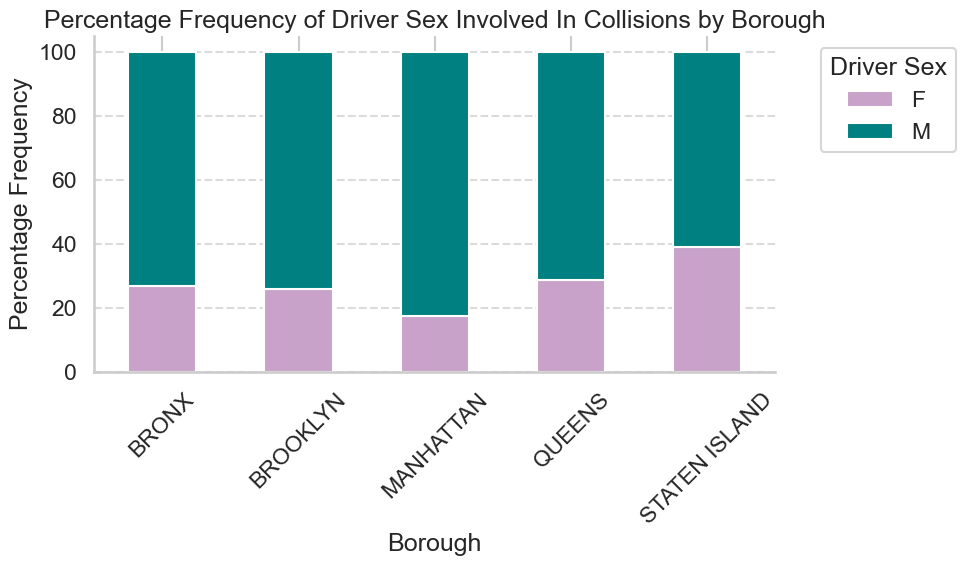

In [65]:
filtered_data = df_crash_vehicle[df_crash_vehicle['DRIVER_SEX'].isin(['M', 'F'])]

grouped_counts = filtered_data.groupby(['BOROUGH', 'DRIVER_SEX']).size().reset_index(name='counts')

pivot_table = grouped_counts.pivot(index='BOROUGH', columns='DRIVER_SEX', values='counts').fillna(0)

pivot_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = ['#C8A2C8', '#008080'] 

plt.figure(figsize=(10, 6))

pivot_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

sns.set_style("whitegrid")
sns.set_context("talk")

plt.title('Percentage Frequency of Driver Sex Involved In Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Percentage Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Driver Sex', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() 

sns.despine()
plt.tight_layout()
plt.show()

A notable observation from this graph is that Staten Island has a higher percentage of collisions involving female drivers compared to the other boroughs. While in the Bronx, Brooklyn, Manhattan, and Queens, the proportion of female-involved collisions is significantly less than male-involved collisions, Staten Island shows a reduced gap between the two.

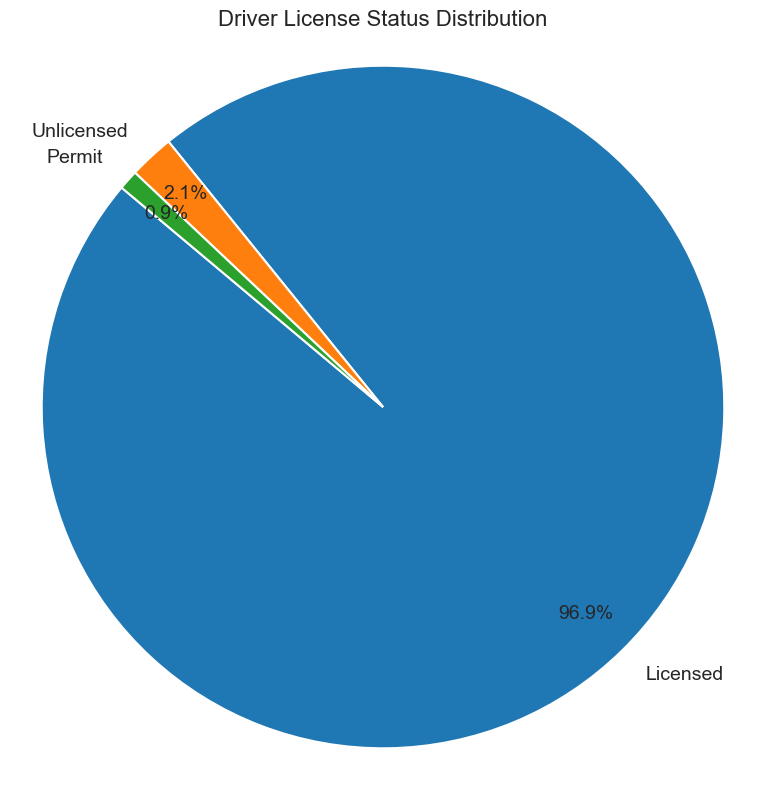

In [66]:
license_status_counts = df_crash_vehicle['DRIVER_LICENSE_STATUS'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(license_status_counts, labels=license_status_counts.index, autopct='%1.1f%%', startangle=140, 
        textprops={'fontsize': 14}, pctdistance=0.85)
plt.axis('equal')
plt.tight_layout()
plt.title('Driver License Status Distribution', fontsize=16)
plt.show()

The pie chart shows that the vast majority of drivers, 96.9%, are licensed, while a small minority have only a permit (0.9%) or are unlicensed (2.1%).

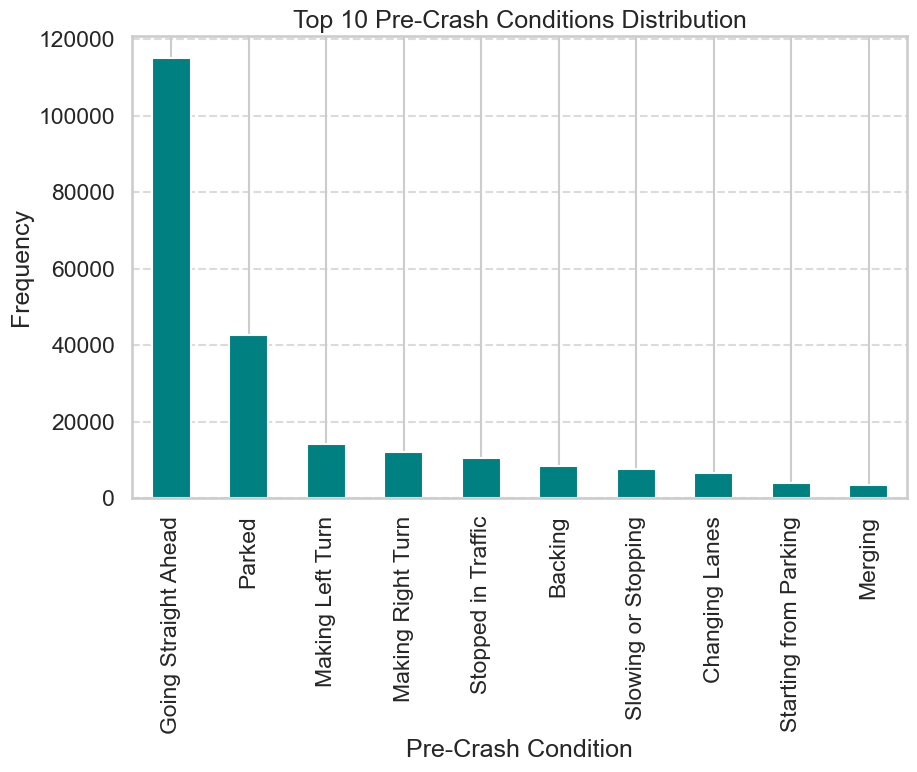

In [67]:
pre_crash_counts_top10 = df_crash_vehicle[df_crash_vehicle['PRE_CRASH'] != 'Unknown']['PRE_CRASH'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 6))
pre_crash_counts_top10.plot(kind='bar', color='teal')
plt.title('Top 10 Pre-Crash Conditions Distribution')
plt.xlabel('Pre-Crash Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows the frequency of different pre-crash conditions. "Going Straight Ahead" leads significantly, indicating that most crashes occur when vehicles are moving forward, followed by lesser incidents of vehicles that were parked. This suggests that the majority of accidents happen under normal driving conditions.

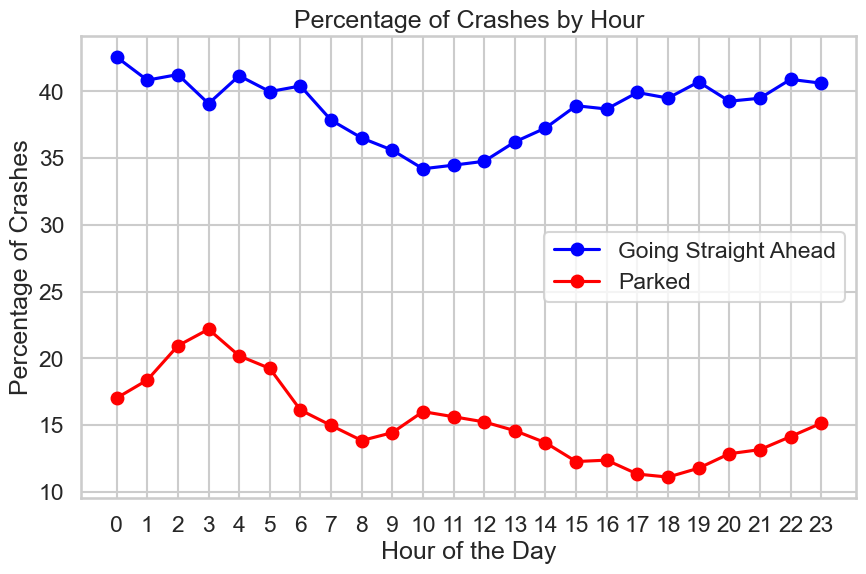

In [68]:
def extract_hour(time_val):
    if pd.isnull(time_val):
        return None
    try:
        return pd.to_datetime(time_val, format='%H:%M').hour
    except Exception:
        try:
            return time_val.hour
        except Exception:
            return None

df_crash_vehicle['CRASH_HOUR'] = df_crash_vehicle['CRASH_TIME'].apply(extract_hour)

total_crashes_hourly = df_crash_vehicle.groupby('CRASH_HOUR').size()

straight_ahead_crashes = df_crash_vehicle[df_crash_vehicle['PRE_CRASH'] == 'Going Straight Ahead']
hourly_trend_straight = straight_ahead_crashes.groupby('CRASH_HOUR').size()

parked_crashes = df_crash_vehicle[df_crash_vehicle['PRE_CRASH'] == 'Parked']
hourly_trend_parked = parked_crashes.groupby('CRASH_HOUR').size()

percentage_straight = (hourly_trend_straight / total_crashes_hourly) * 100
percentage_parked = (hourly_trend_parked / total_crashes_hourly) * 100

plt.figure(figsize=(10, 6))
plt.plot(percentage_straight.index, percentage_straight.values, marker='o', linestyle='-', color='blue', label='Going Straight Ahead')
plt.plot(percentage_parked.index, percentage_parked.values, marker='o', linestyle='-', color='red', label='Parked')
plt.title('Percentage of Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Crashes')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

This line graph shows that crashes involving vehicles going straight peak during the morning and evening, maintaining high levels from morning until late night, suggesting active traffic hours have higher incident rates. Meanwhile, crashes involving parked vehicles have a different pattern, peaking during early morning hours and decreasing in the later in time.

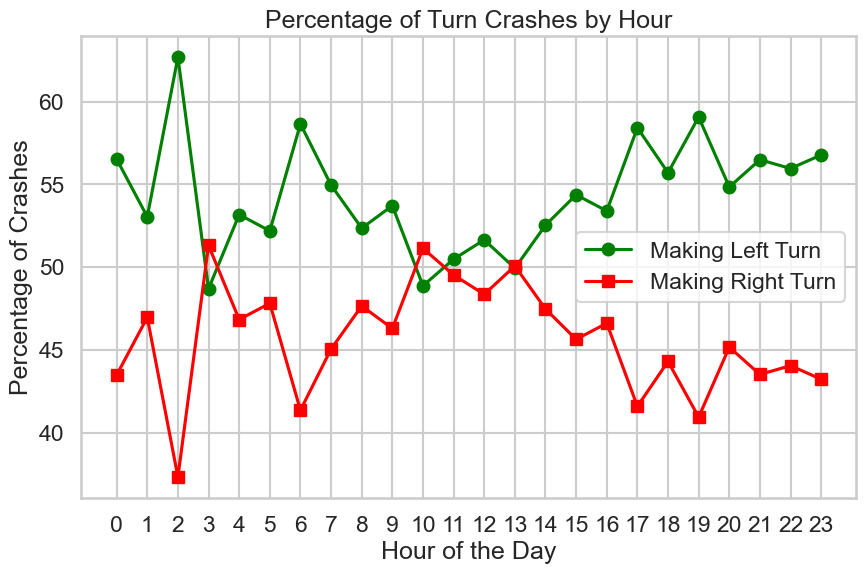

In [69]:
df_crash_vehicle['CRASH_HOUR'] = df_crash_vehicle['CRASH_TIME'].apply(extract_hour)

turn_crashes = df_crash_vehicle[df_crash_vehicle['PRE_CRASH'].isin(['Making Left Turn', 'Making Right Turn'])]

total_turn_crashes_hourly = turn_crashes.groupby('CRASH_HOUR').size()

left_turn_crashes = turn_crashes[turn_crashes['PRE_CRASH'] == 'Making Left Turn']
hourly_left_trend = left_turn_crashes.groupby('CRASH_HOUR').size()

right_turn_crashes = turn_crashes[turn_crashes['PRE_CRASH'] == 'Making Right Turn']
hourly_right_trend = right_turn_crashes.groupby('CRASH_HOUR').size()

percentage_left_turn = (hourly_left_trend / total_turn_crashes_hourly) * 100
percentage_right_turn = (hourly_right_trend / total_turn_crashes_hourly) * 100

plt.figure(figsize=(10, 6))
plt.plot(percentage_left_turn.index, percentage_left_turn.values, marker='o', linestyle='-', color='green', label='Making Left Turn')
plt.plot(percentage_right_turn.index, percentage_right_turn.values, marker='s', linestyle='-', color='red', label='Making Right Turn')
plt.title('Percentage of Turn Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Crashes')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

The line graph details the percentage of crashes related to making left or right turns throughout the day. Interestingly, left turn crashes peak during midday and evening, potentially correlating with higher traffic volumes and complex intersections encountered during these times. Right turn crashes are less frequent and do not exhibit as strong of a diurnal pattern but still show some increase during typical rush hours.